# Self Case Study I

## Allstate Insurance Claims Severity

# Objective:
<h> Allstate is among the top 10 insurers in the United States of America. So their goal is to provide the best customer service to their customers. They also have a slogan "You're in Good Hands" since 1950.

# Business Problem:
<h> Allstate wants to build an automated system for their customers to predict the approximate claim settlement amount using ML and DL techniques to provide a good customer service.

# Reference:
<h> https://www.kaggle.com/c/allstate-claims-severity/overview
    
<h> https://github.com/MayureshShilotri/26-Weeks-Of-Data-Science/blob/master/Week-10-Advanced_linear_regression/notebooks/Week-10%20notebook.ipynb

# Data Description:
<h> This dataset consists two files of train.csv and test.csv.
<h> The total number of datapoints in train.csv are 188318 with 131 features and one target variable loss.
    Similary, for test.csv we have 125546 with 130 features excluding our target variable.
<h> Luckily, we don't have any missing values in our dataset but we have 116 categorical features representing different property location and 14 continuous features which ranges from 0 - 1.

# Performance Metric:
<h> MAE: Mean absolute Error

<h> MSE: Mean Square Error
    
<h> MAPE: Mean Absolute Percentage Error

In [1]:
import pandas as pd
import numpy as np
import sklearn
from datetime import datetime
import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from matplotlib import rcParams
import math 
import pickle
import os
import xgboost as xgb
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import tsfresh.feature_extraction.feature_calculators as ts
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [2]:
data = pd.read_csv('train.csv')
data.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [3]:
print(data.shape)

(188318, 132)


In [4]:
data.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [5]:
#dropping the id column
dataset = data.iloc[:,1:]
dataset.shape

(188318, 131)

In [6]:
#just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(dataset.isnull().any()))

No of Nan values in our dataframe :  0


There is no missing values in our dataset

In [7]:
dup_bool = dataset.duplicated()
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate entries in the data..".format(dups))

There are 0 duplicate entries in the data..


There is no duplicate entries in our dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 188.2+ MB


In [9]:
numerical_features = list(dataset._get_numeric_data().columns)
numerical_features

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

Except id and loss we know we have 14 numerical features

In [10]:
categorical_features = list(set(dataset.columns) - set(dataset._get_numeric_data().columns))
print(len(categorical_features))

116


Now we know that we have 116 categorical features

In [11]:
log_func = np.log(data['loss']*200)

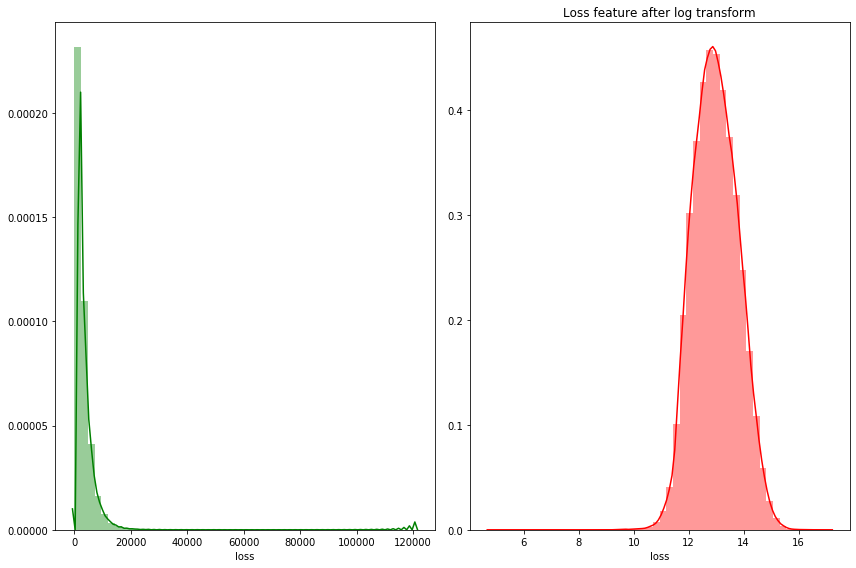

In [12]:
#plt.figure(figsize = (12,8))
fig, ax = plt.subplots(1,2, figsize = (12,8))
plt.title('Loss feature without log transform')
sns.distplot(data['loss'],color = 'g', ax = ax[0])
plt.title('Loss feature after log transform')
sns.distplot(log_func,color = 'r', ax = ax[1])
plt.tight_layout()
fig.show()
plt.savefig('Loss feature')

<h> If we can notice the left figure it is highly skewed to the left side which means it highly negatively skewed.It clearly states that our loss feature has many outliers, which we can remove using our simple hack 1.5*IQR range.
    
<h> If we notice the right handside figure after using log transform we can see it is more of kind of normal distribution

# [1] EDA

## [1.1] Categorical Features

In [13]:
categorical_features.sort()

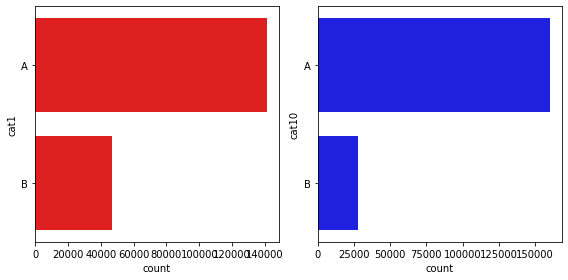

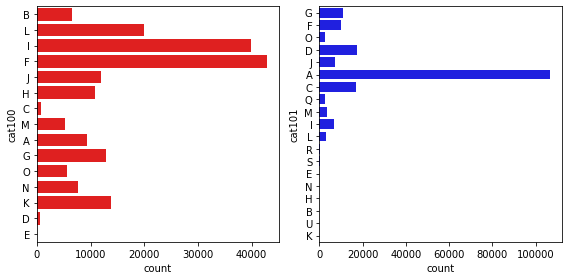

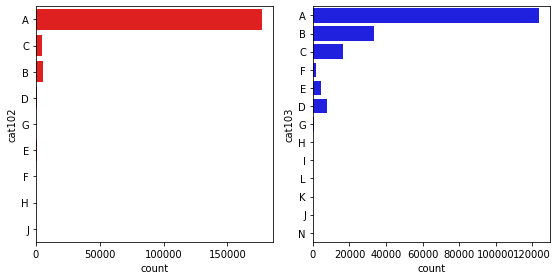

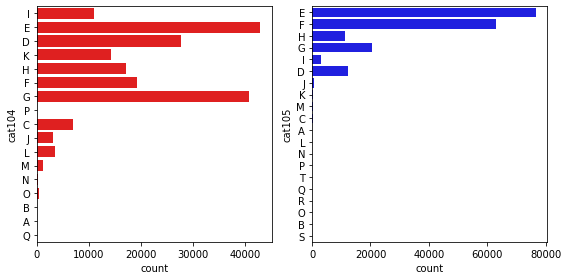

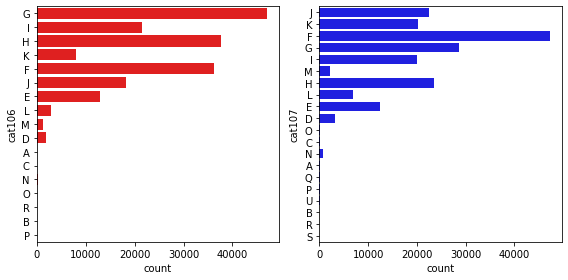

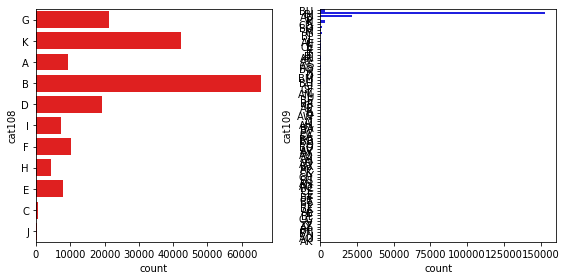

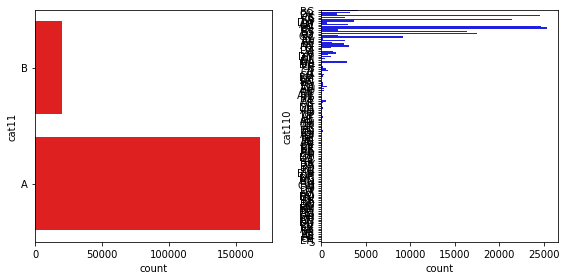

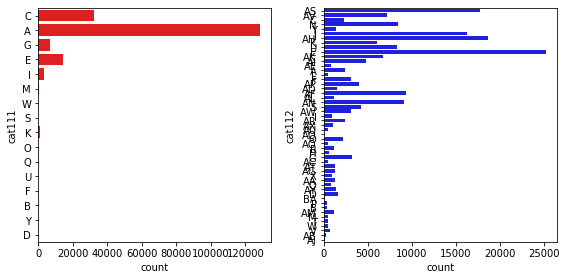

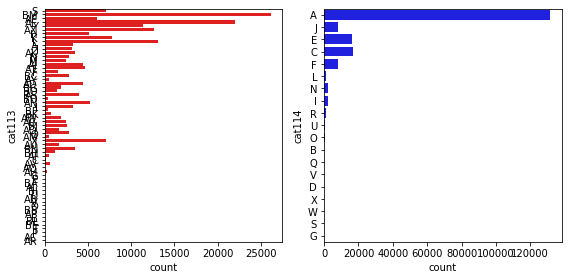

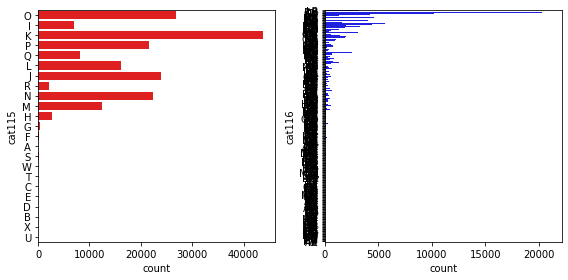

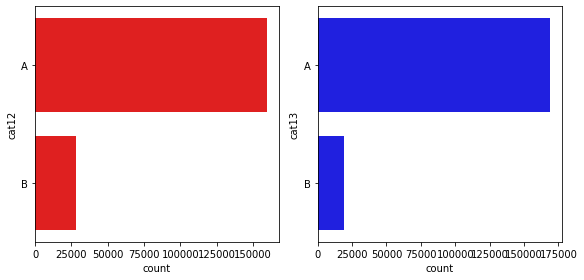

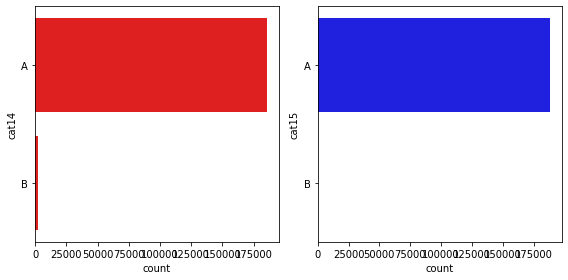

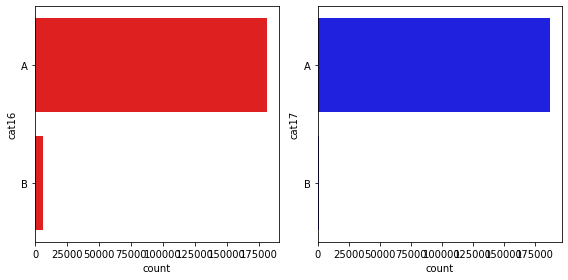

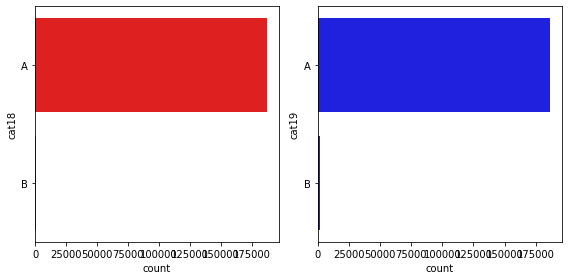

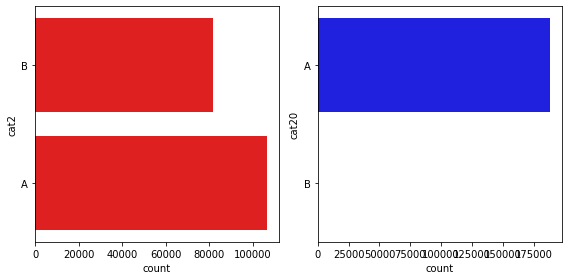

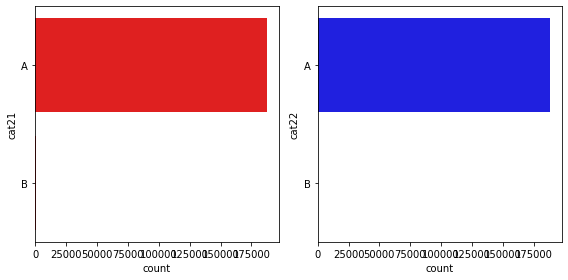

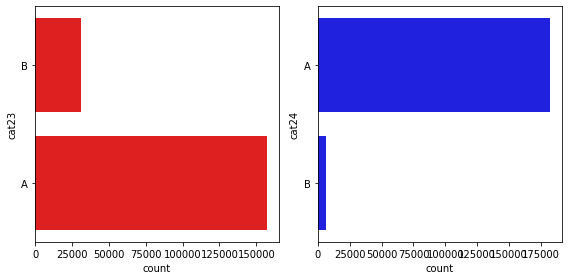

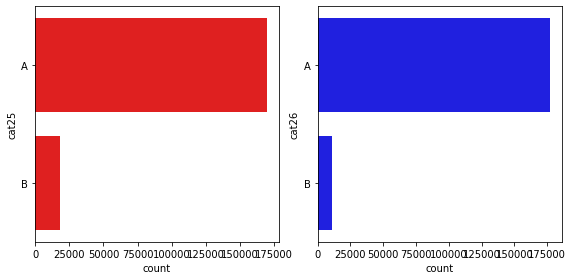

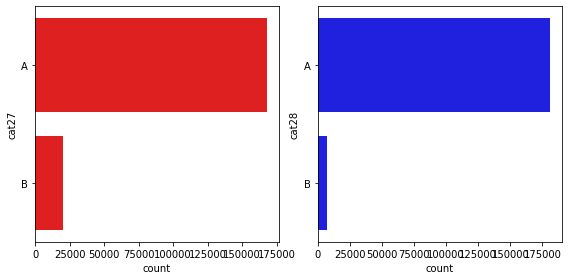

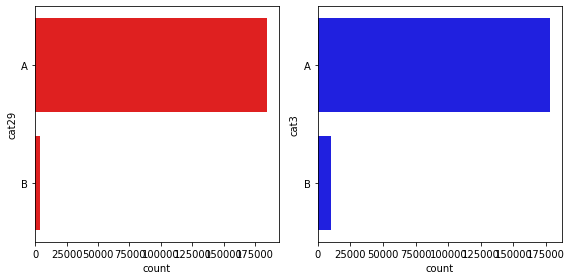

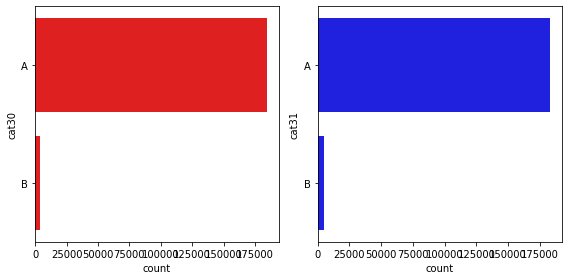

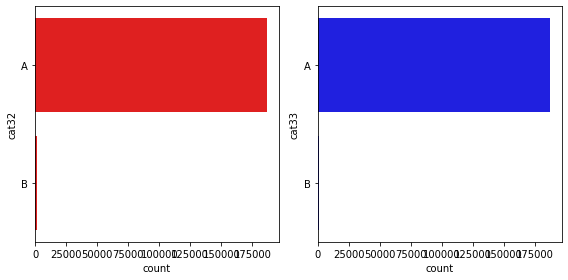

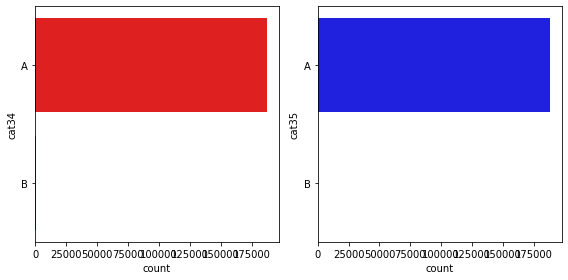

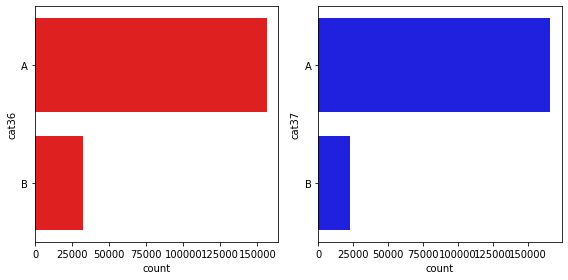

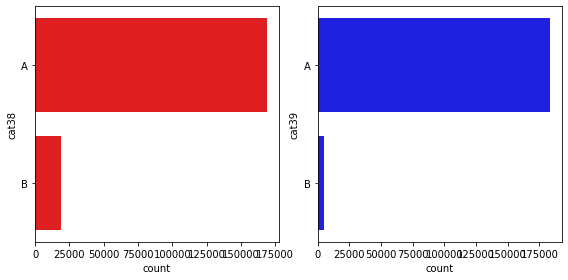

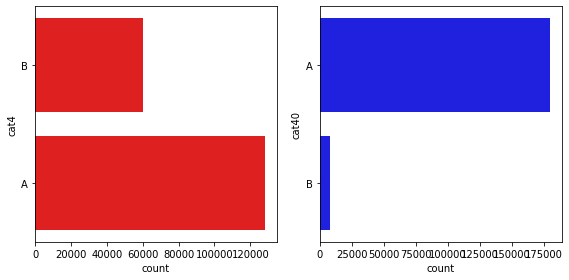

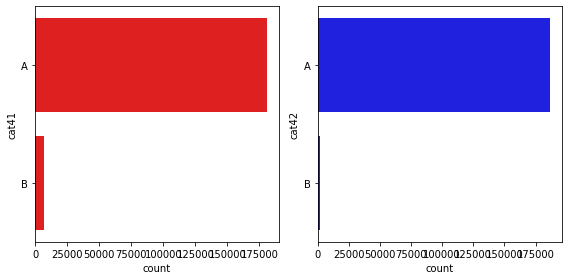

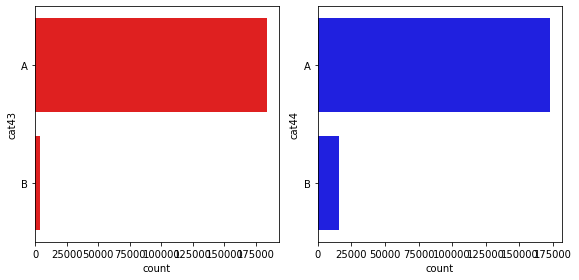

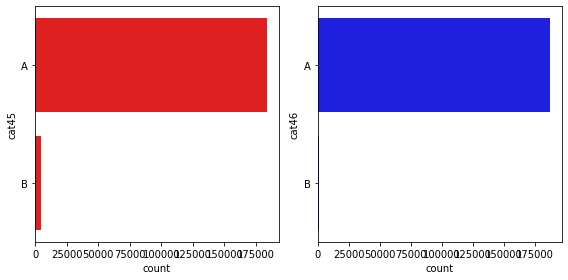

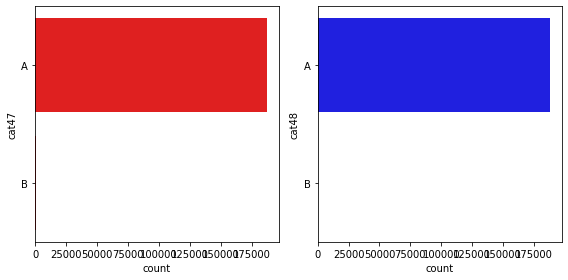

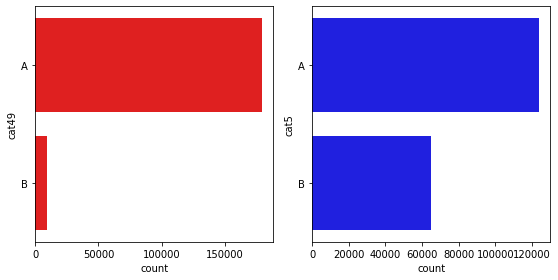

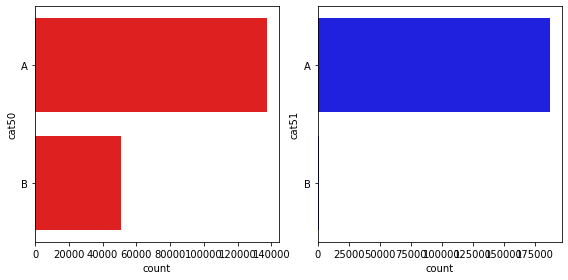

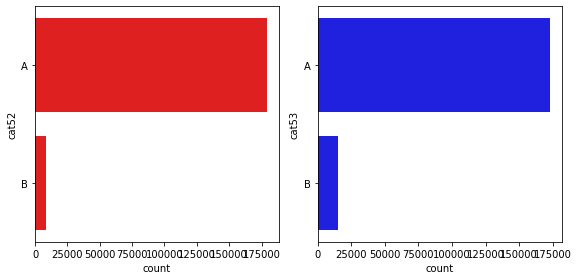

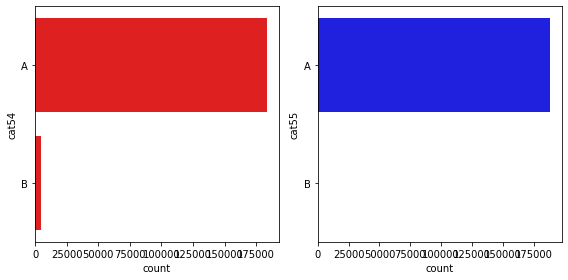

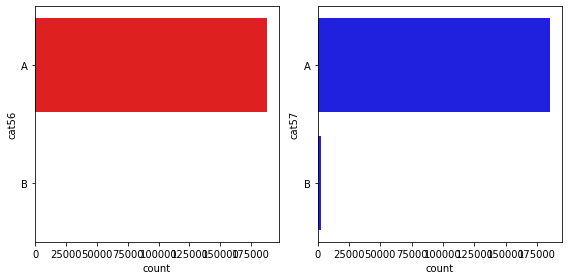

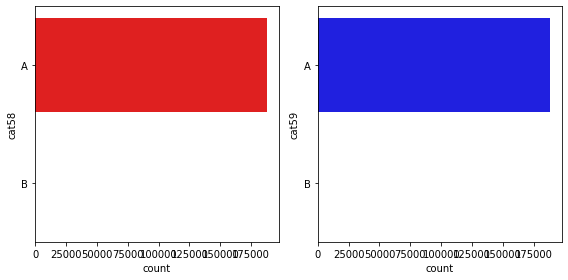

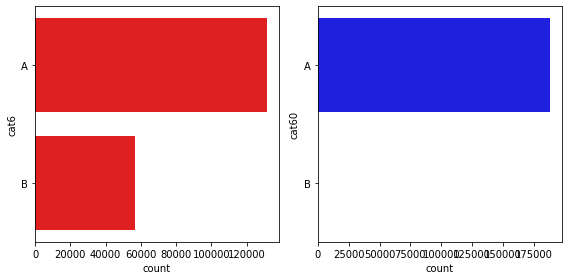

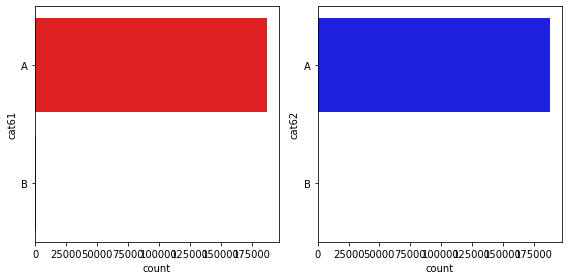

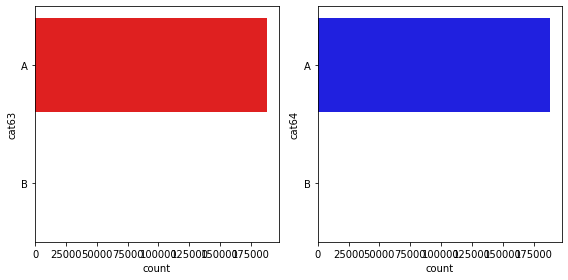

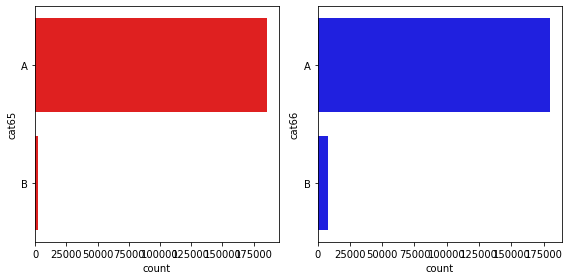

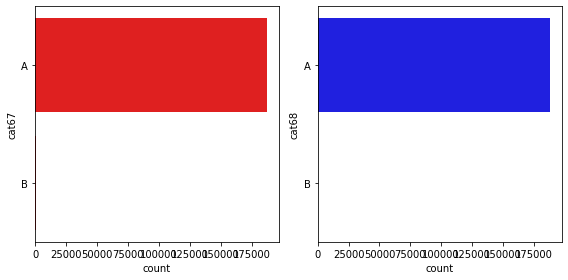

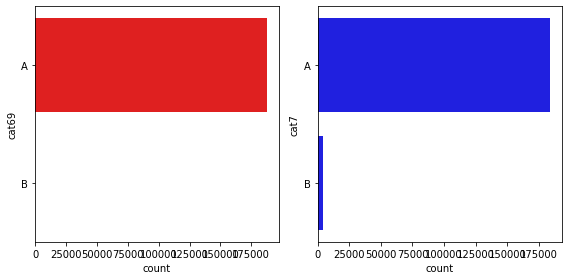

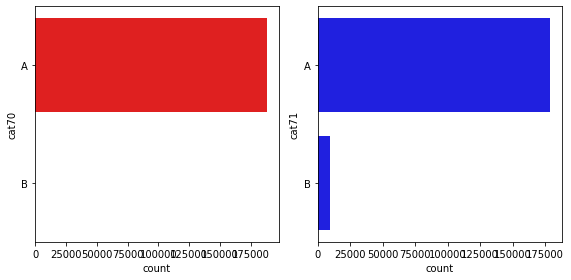

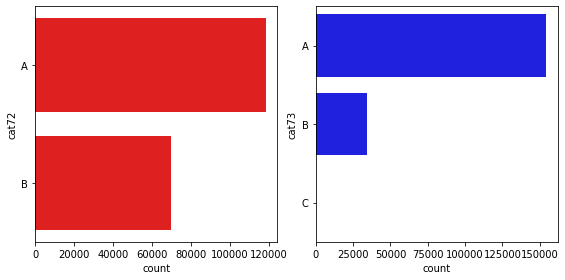

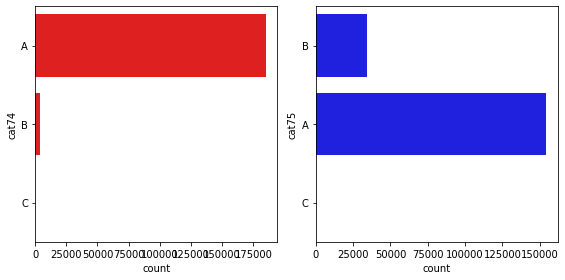

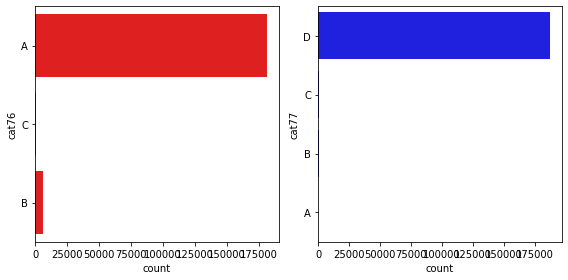

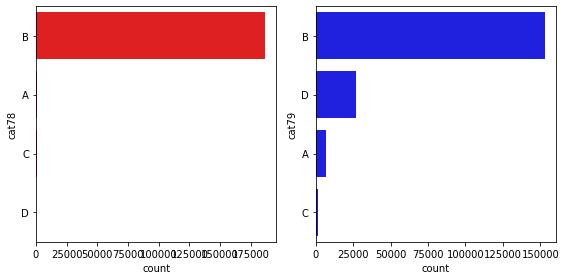

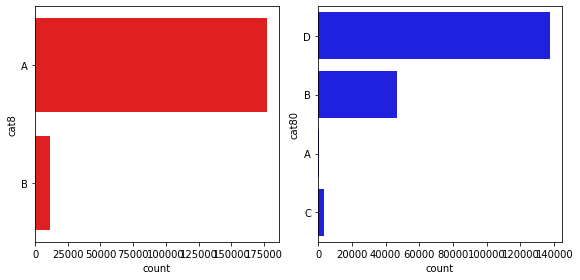

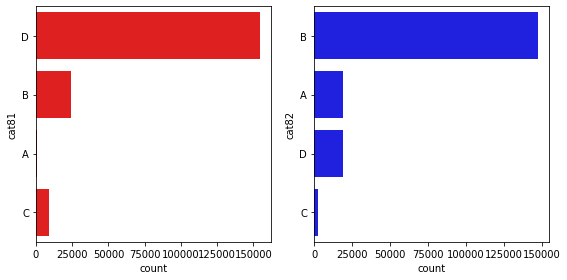

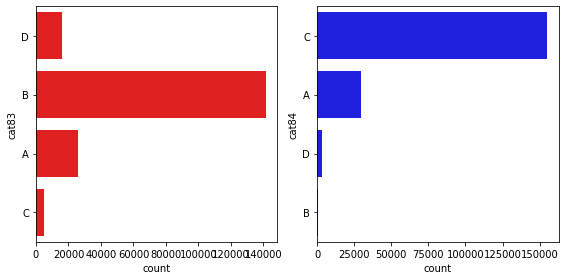

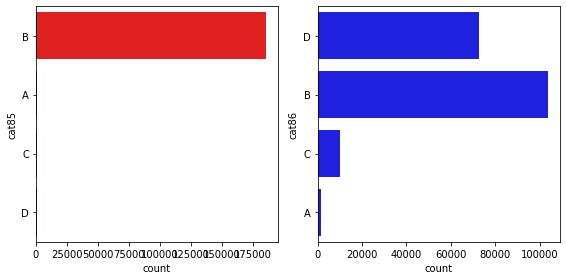

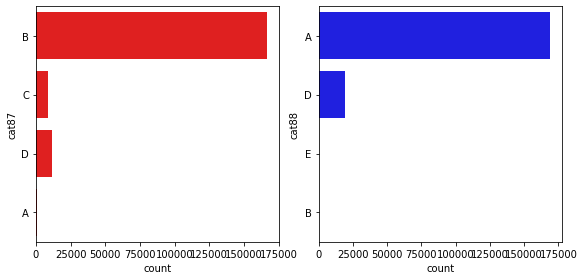

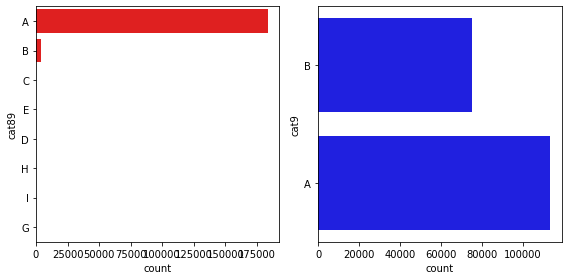

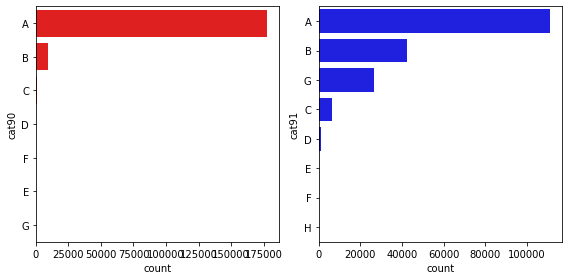

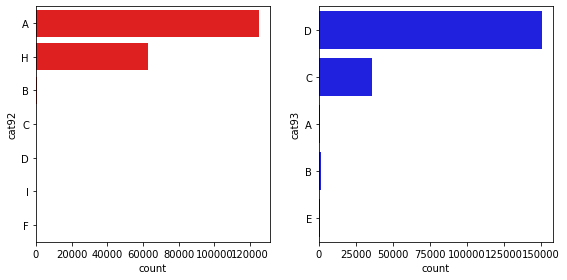

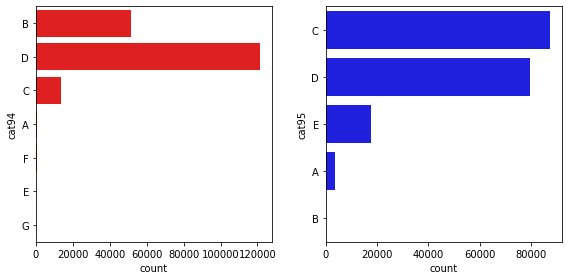

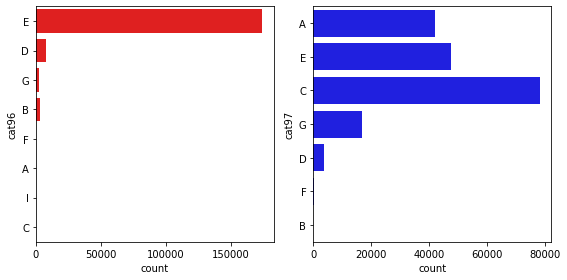

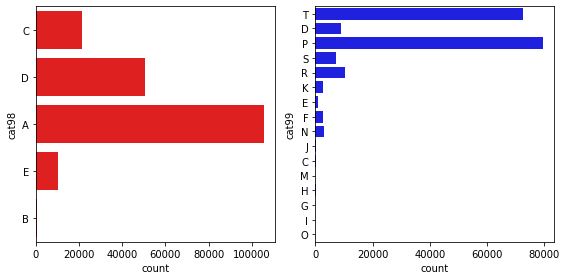

In [13]:
for i in range(0,len(categorical_features), 2):
    if len(categorical_features) > i+1:
        plt.figure(figsize= (8,4))
        nrows = 0
        plt.subplot(121)
        sns.countplot(y = dataset[categorical_features[i]],color = 'r', data = dataset)
        plt.subplot(122)
        sns.countplot(y = dataset[categorical_features[i+1]],color = 'b', data = dataset)
        plt.tight_layout()
        plt.show()
    else:
        sns.countplot(categorical_features[i],data = dataset)

<h> With the plot above we can say that features from cat1 to cat72 have only two categories of type A and type B.

<h> And features like cat110,cat112,cat113 and cat116 have multiple categoris for which we can do univariate analysis

# [1.1.1] Univariate Analysis

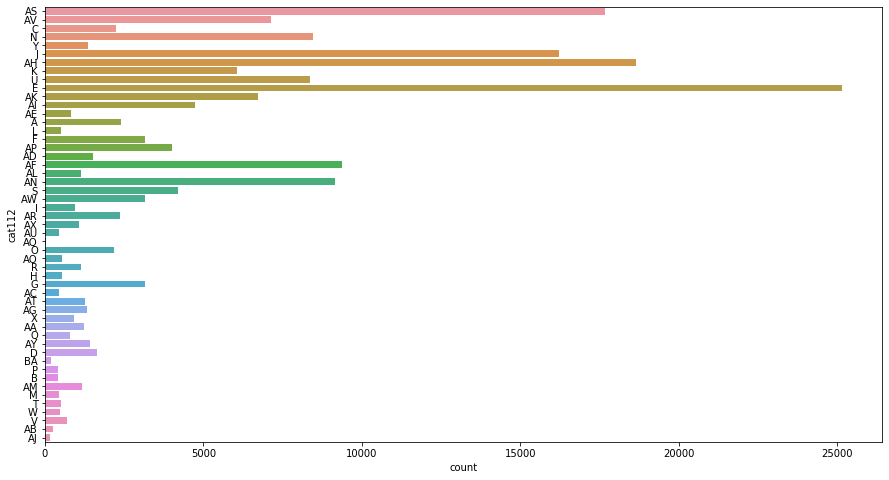

In [31]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'cat112', data = dataset)
plt.show()

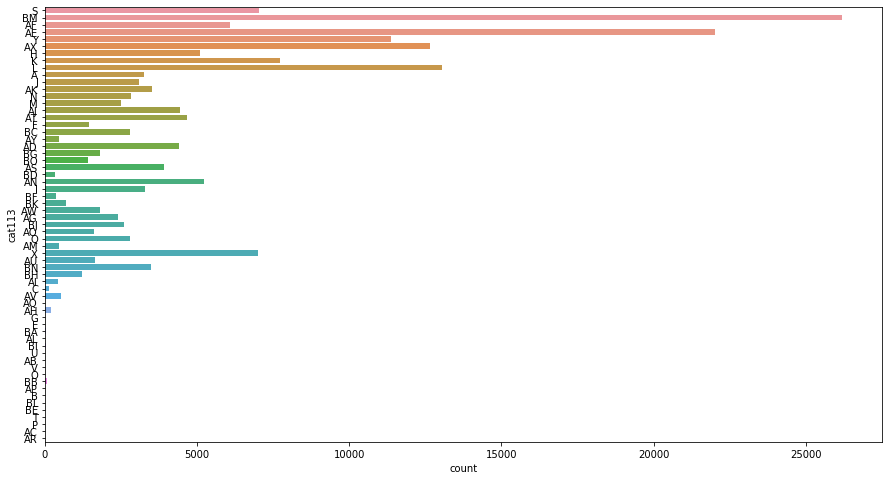

In [33]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'cat113', data = dataset)
plt.show()

We tried Univariate analysis on the features with multiple categories, but the result is visble only for cat113 and cat112. For the the features like cat110 and cat116 the results are not visible.

## [1.2] Numerical features

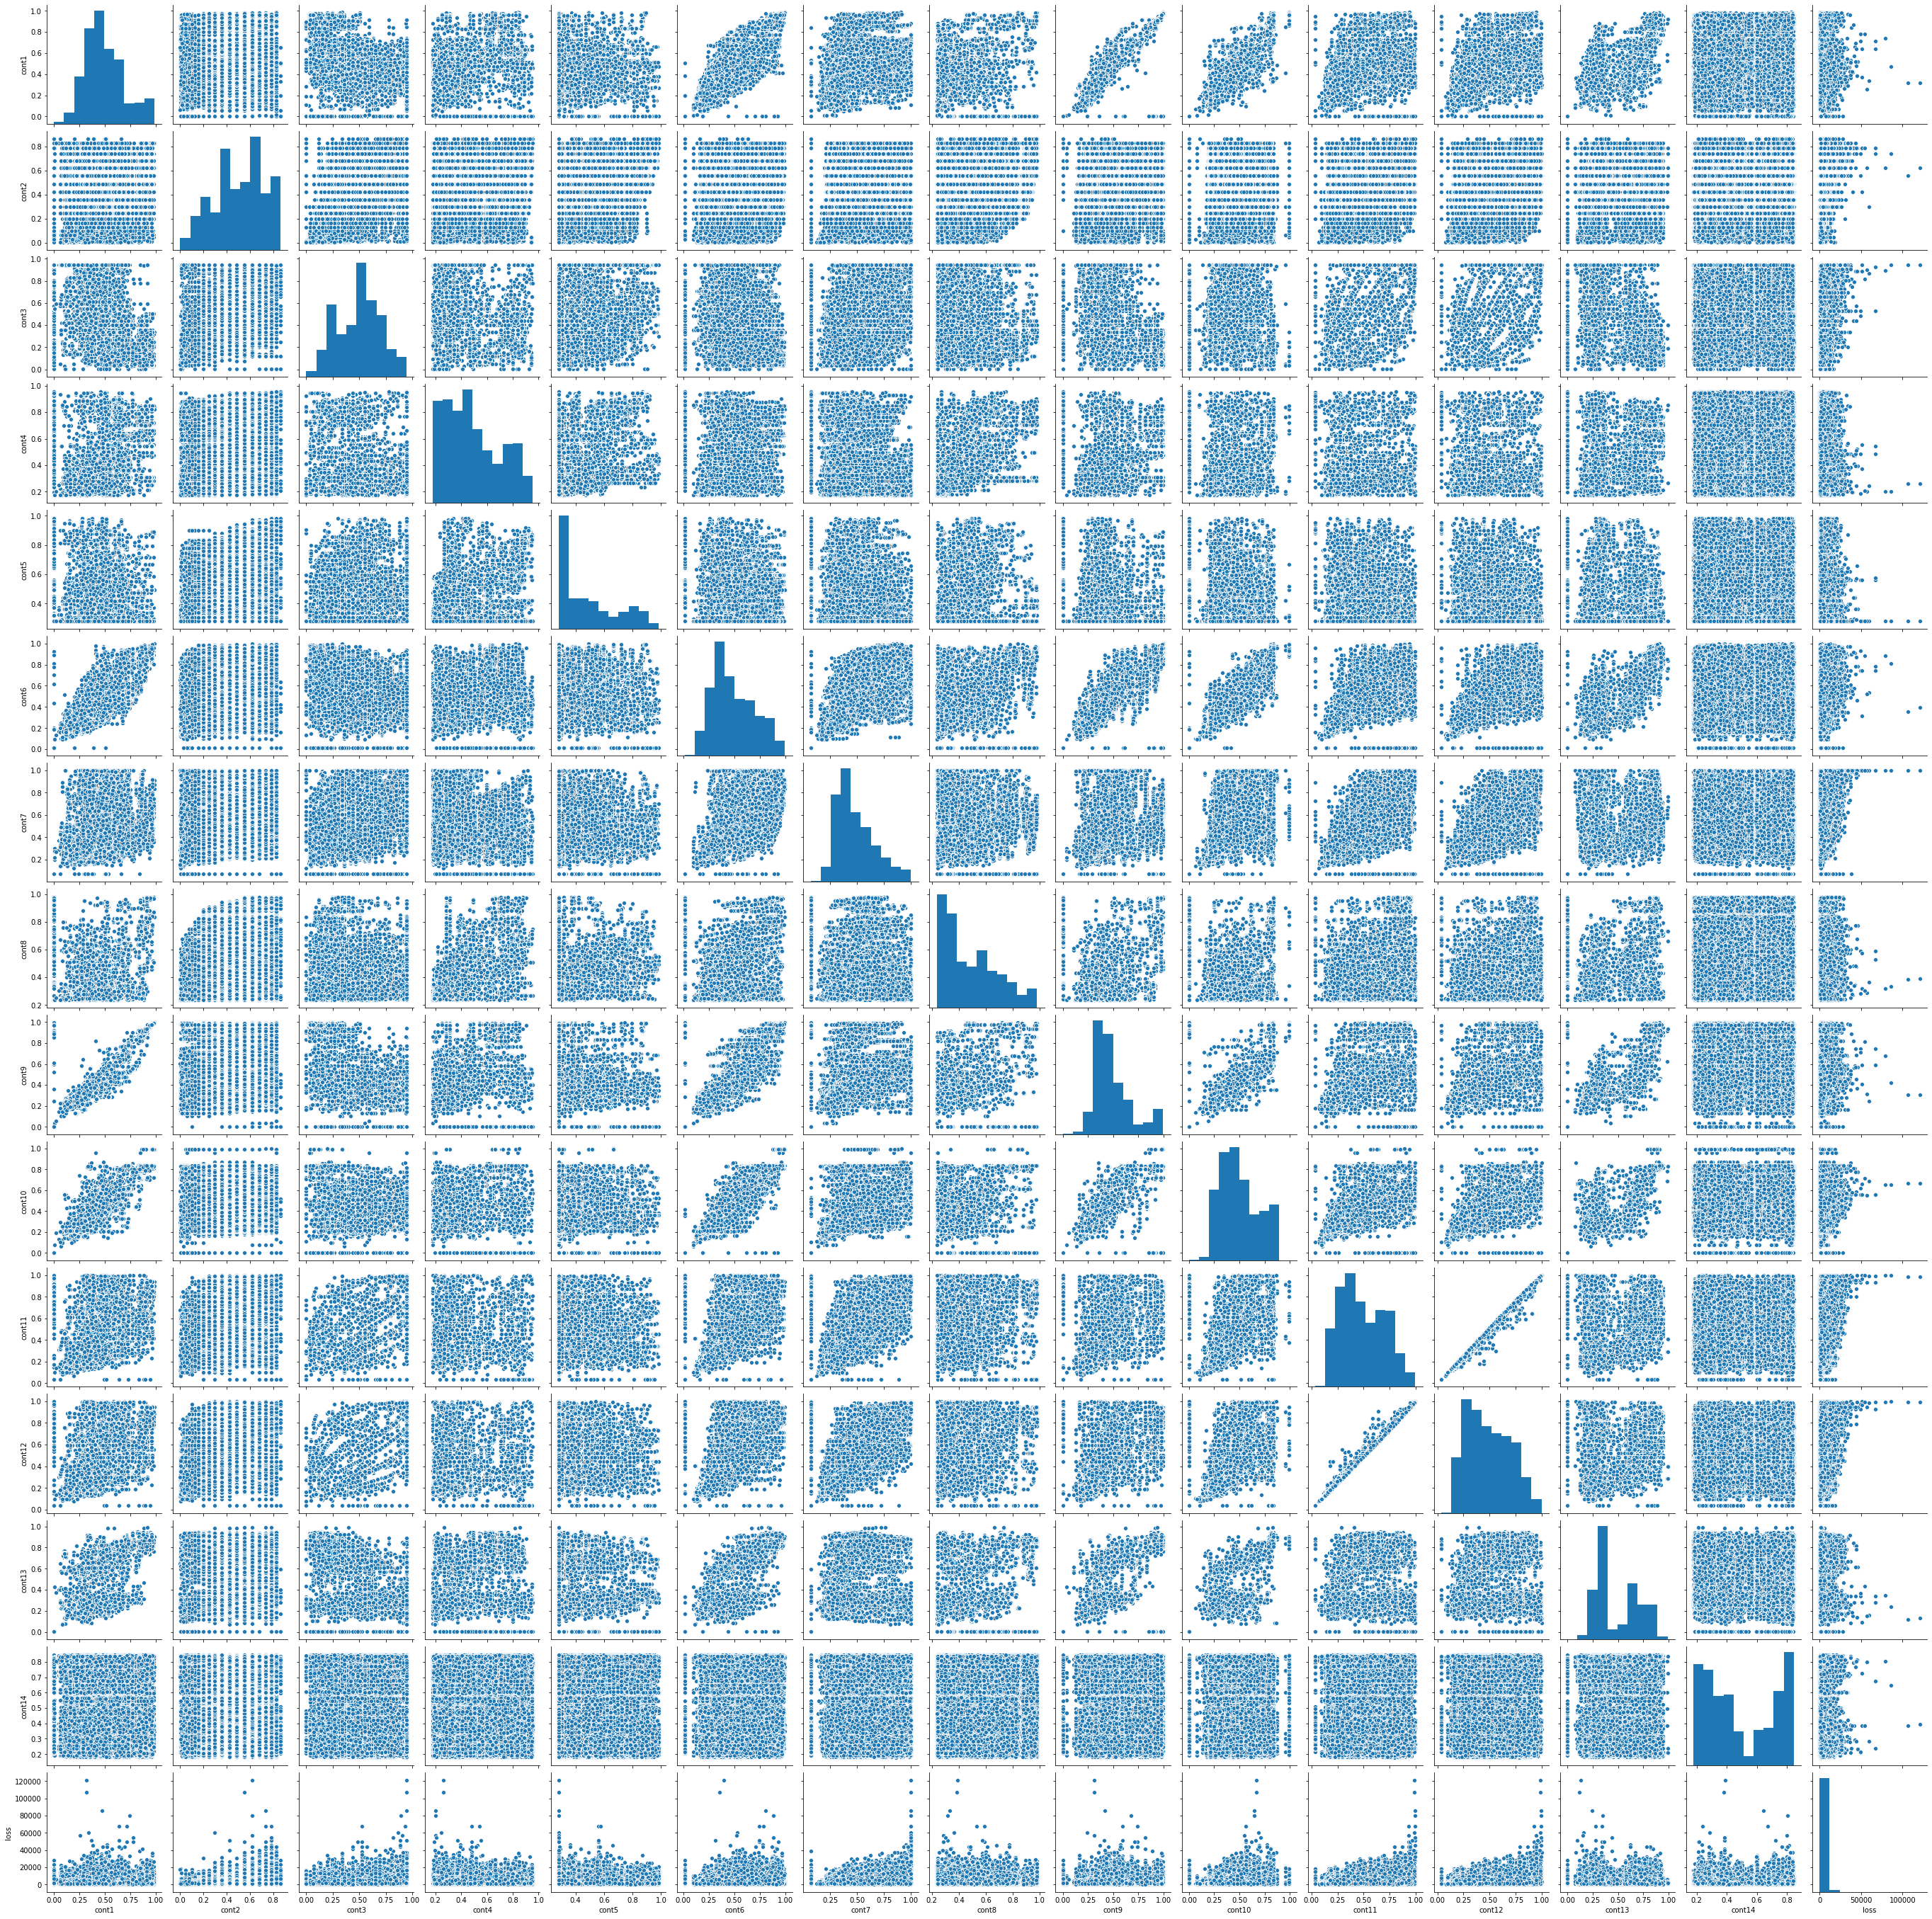

In [67]:
sns.pairplot(dataset[numerical_features])

In [14]:
numerical_features_ = numerical_features[:14]
numerical_features_

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

Showing distribution using simple histograms

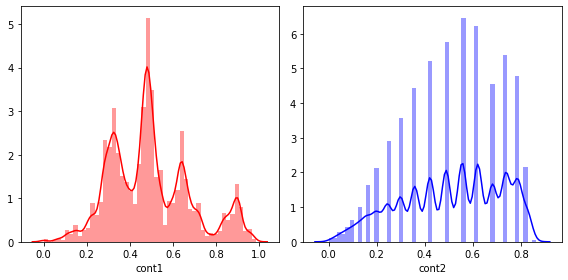

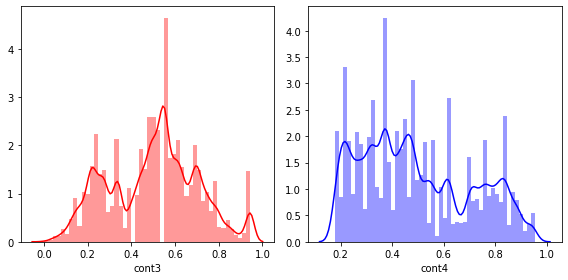

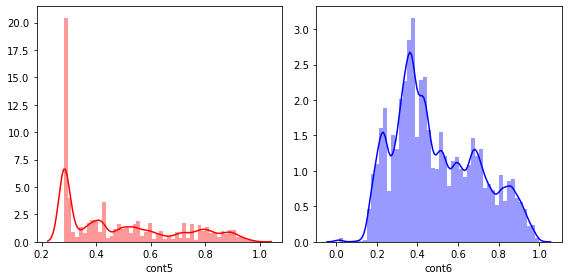

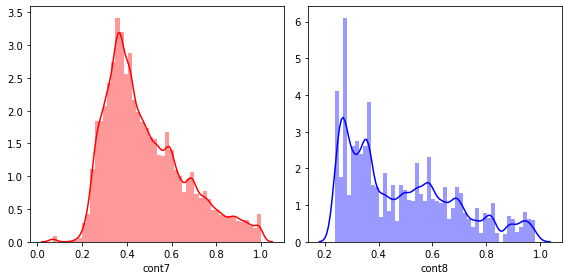

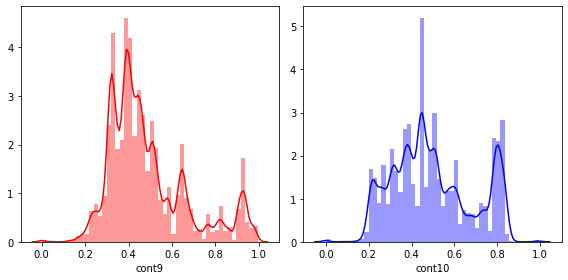

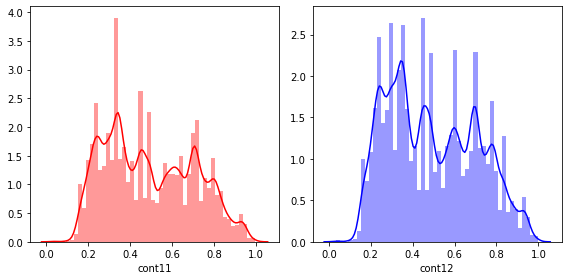

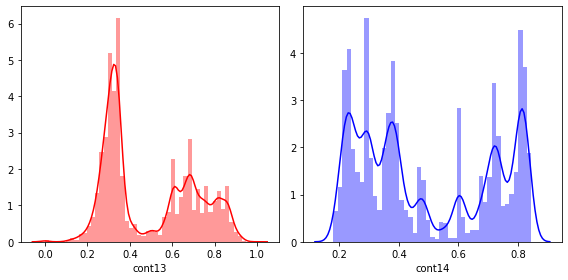

In [13]:
for i in range(0,len(numerical_features_), 2):
    if len(numerical_features_) > i+1:
        plt.figure(figsize= (8,4))
        nrows = 0
        plt.subplot(121)
        sns.distplot(dataset[numerical_features_[i]],color = 'r', hist = True, kde = True)
        plt.subplot(122)
        sns.distplot(dataset[numerical_features_[i+1]],color = 'b', hist = True, kde = True)
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(numerical_features_[i],hist = True, kde = True)

<h> If we check the above plots we can easily say that features like cont2,cont4, cont5 and cont7 can easily be transformed into log transform and can be used for our ML models.
    
<h> We can also note that all the values for numerical features lie between 0-1.

We can see the similar plots using violin plots

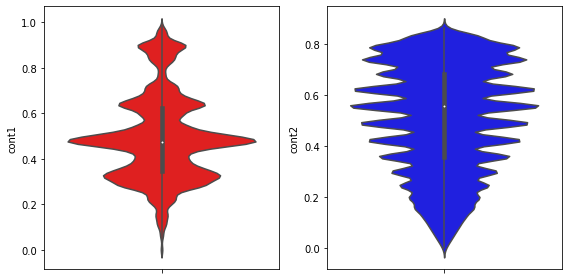

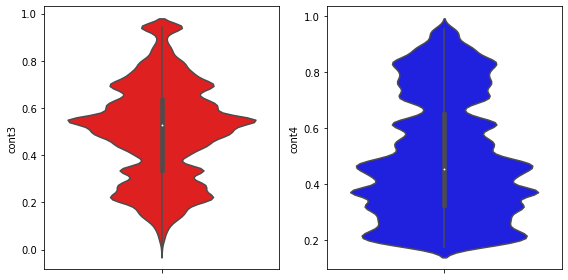

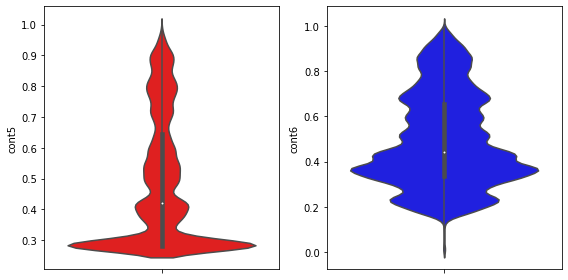

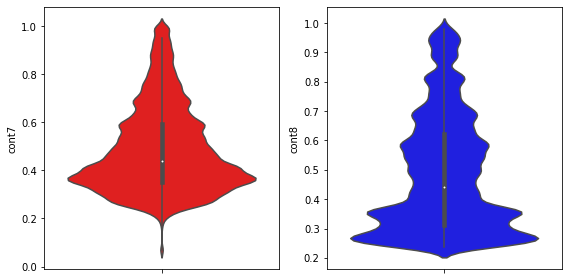

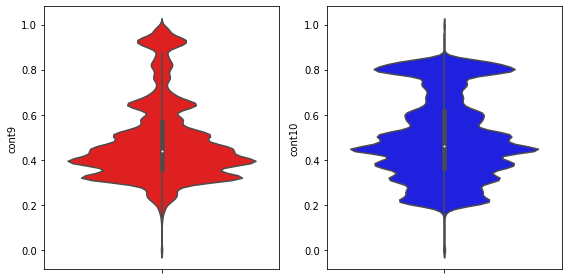

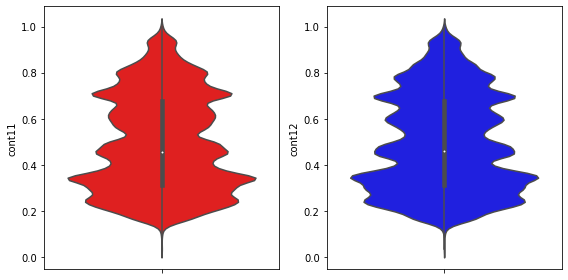

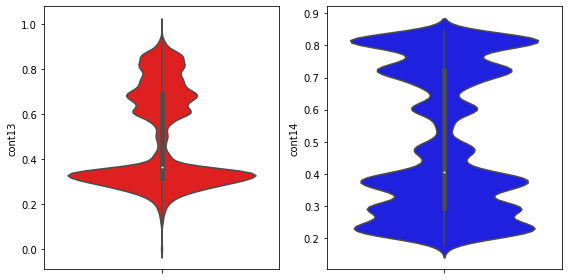

In [15]:
for i in range(0,len(numerical_features_), 2):
    if len(numerical_features_) > i+1:
        plt.figure(figsize= (8,4))
        nrows = 0
        plt.subplot(121)
        sns.violinplot(y = dataset[numerical_features_[i]],color = 'r', data = dataset)
        plt.subplot(122)
        sns.violinplot(y = dataset[numerical_features_[i+1]],color = 'b', data = dataset)
        plt.tight_layout()
        plt.show()
    else:
        sns.violinplot(numerical_features_[i],data = dataset)

<h> Now with the help of violinplots we can say most of the values in cont11,cont9,cont12 and cont7 lies at 0.5.
    
<h> With that concluson we can also use square root of the function as a feature transform for our ML model.

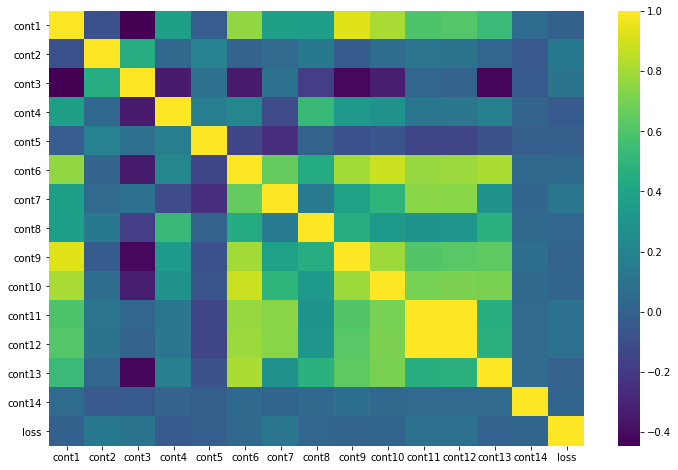

In [59]:
plt.figure(figsize = (12,8))
sns.heatmap(dataset.corr(), cmap = 'viridis')

<h> cont11 and cont12 are highly correlated among themselves, we need to remove either one of those features
    
<h> cont1 and cont9 are highly correlated among themselves, we need to remove either one of those features

<h> cont6 and cont10 are highly correlated among themselves, we need to remove either one of those features

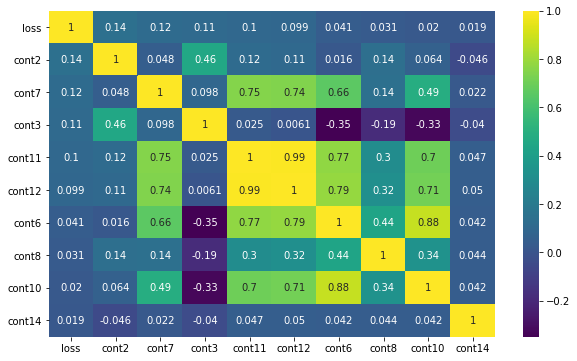

In [38]:
k = 10 #number of variables for heatmap
cols = dataset.corr().nlargest(k, 'loss')['loss'].index
cm = dataset[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [12]:
#https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [15]:
num_feat_after_corr = correlation(dataset[numerical_features_],.80)
num_feat_after_corr

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0       0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1       0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2       0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3       0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4       0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   
...          ...       ...       ...       ...       ...       ...       ...   
188313  0.347403  0.785784  0.613660  0.473202  0.939556  0.242437  0.289949   
188314  0.507661  0.555782  0.549770  0.802892  0.704268  0.334270  0.382000   
188315  0.484469  0.785784  0.792378  0.189137  0.482436  0.345883  0.370534   
188316  0.438385  0.422197  0.298977  0.383428  0.340543  0.704364  0.562866   
188317  0.907272  0.620805  0.440642  0.821574  0.281143  0.844563  0.533048   

          cont8    cont11    cont14  
0

In [16]:
cols = ['cont1', 'cont2', 'cont3','cont4','cont5','cont6','cont7',\
                      'cont8','cont11','cont14','loss']

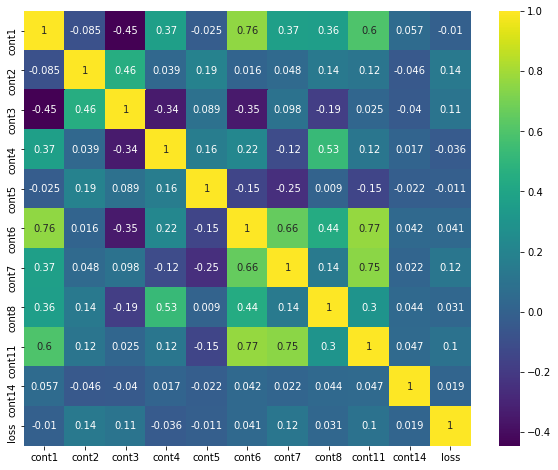

In [16]:
#Now we will check the heatmap for this 10 features only
corr = dataset[cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot = True, cmap = 'viridis')

# [1.3] Numeric and Categorical Features

In [17]:
#Taking categorical features which lie between the levels 5-10
Filter_cat_features = list((dataset[categorical_features].apply(pd.Series.nunique) > 5)
                           & (dataset[categorical_features].apply(pd.Series.nunique) < 10))

In [18]:
cat_filtered_features = [i for (i,v) in zip(categorical_features,Filter_cat_features) if v]
print(len(cat_filtered_features))

8


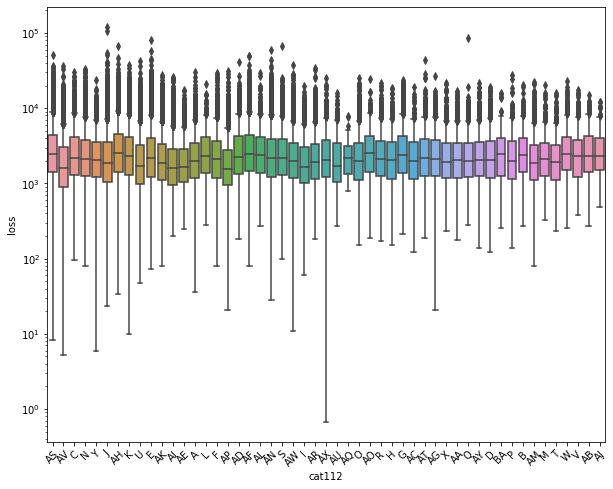

In [54]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 45)
sns.boxplot('cat112', 'loss', data = dataset)
plt.yscale('log')
plt.autoscale(True)
plt.show()

In [19]:
cat_filtered_features.sort()

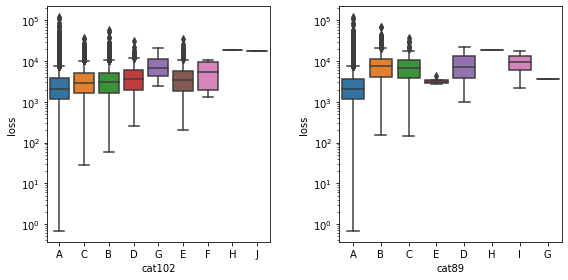

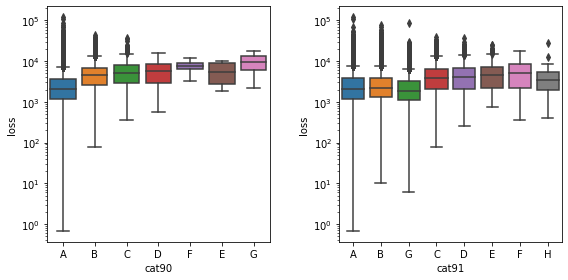

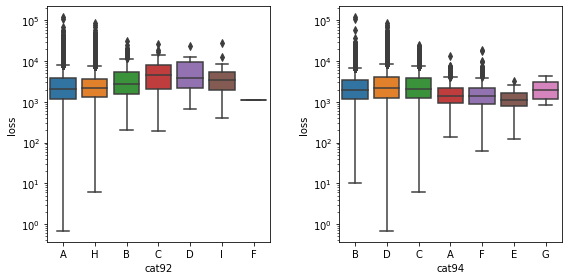

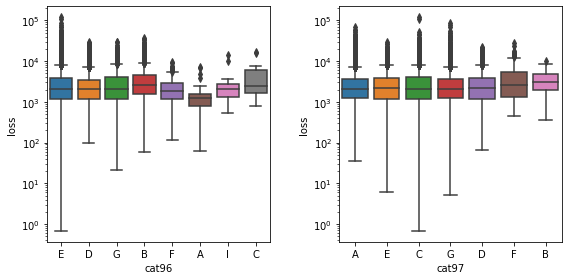

In [73]:
for i in range(0,len(cat_filtered_features), 2):
    if len(cat_filtered_features) > i+1:
        plt.figure(figsize= (8,4))
        nrows = 0
        plt.subplot(121)
        sns.boxplot(dataset[cat_filtered_features[i]],dataset['loss'], data = dataset)
        plt.yscale('log')
        plt.autoscale(True)
        plt.subplot(122)
        sns.boxplot(dataset[cat_filtered_features[i+1]],dataset['loss'], data = dataset)
        plt.tight_layout()
        plt.yscale('log')
        plt.autoscale(True)
        plt.show()
    else:
        sns.boxplot(cat_filtered_features[i],dataset['loss'],data = dataset)

<h> As there were many outliers in our loss feature so we scale y axis with log value and plotted BoxPlots.
    
<h> Now we can see in the above plots clearly that for categories like cat96, cat97, cat90, cat91 we have our data well distributed.This observation can be very useful for feature transformations.
    
<h> I have noticed that for most of the features let it be categorical or numerical we have most of the loss values in the median range.So, we can go ahead and use the technique like 1.5*IQR for outliers removal.

# [1.4] Outliers Removal

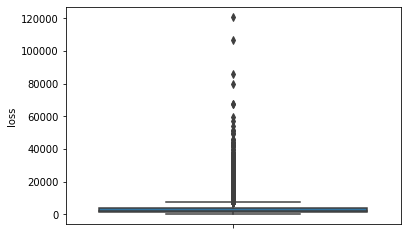

In [19]:
sns.boxplot(y = dataset['loss'])

In [20]:
Loss = pd.Series(dataset['loss'])
q1 = Loss.quantile(0.25) #first quartile range
q3 = Loss.quantile(0.75) #third quartile range
IQR = q3-q1
print('\nIQR:',IQR)
print('*'*50)
outlier_lower_limit = q1 - 1.5*(IQR)
outlier_upper_limit = q3 + 1.5*(IQR)
print(outlier_lower_limit)
print(outlier_upper_limit)


IQR: 2659.5850000000005
**************************************************
-2784.9175000000005
7853.422500000001


In [21]:
lower_limit_outliers = Loss[Loss < outlier_lower_limit].count()
upper_limit_outliers = Loss[Loss > outlier_upper_limit].count()
print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print('*'*50)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 11554
**************************************************
total outliers: 11554


In [22]:
#sample[ (sample.Salary > u) | (sample.Salary < l) ]
dataset_after_outlier_removal = dataset[(dataset.loss > outlier_upper_limit) | (dataset.loss < outlier_lower_limit)]
dataset_after_outlier_removal.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6  \
8     A    B    B    B    B    A    A    A    B     B  ...  0.628534   
28    A    B    A    B    A    B    A    A    B     A  ...  0.671307   
37    A    A    A    B    A    B    B    B    A     A  ...  0.463958   
45    A    B    A    B    A    A    B    A    B     B  ...  0.894682   
65    A    B    B    B    A    A    B    B    B     B  ...  0.458113   

       cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
8   0.384099  0.61229  0.38249  0.51111  0.682315  0.669033  0.756454   
28  0.464924  0.33906  0.62542  0.66076  0.607500  0.594646  0.678452   
37  0.745362  0.68308  0.34365  0.43919  0.812519  0.800726  0.199940   
45  0.671992  0.80438  0.93884  0.80218  0.821840  0.832658  0.854872   
65  0.862654  0.73247  0.43111  0.36974  0.843548  0.832658  0.236253   

      cont14      loss  
8   0.361191  10280.20  
28  0.285224  11673.03  
37  0.836949  11248.08  
45  0.338507  10104.79  
65  0.236756  11706.75  

[5 rows x 131 columns]

In [23]:
dataset_after_outlier_removal.shape

(11554, 131)

In [24]:
dataset.shape

(188318, 131)

In [25]:
percentage_of_outlier = (dataset_after_outlier_removal.shape[0]/dataset.shape[0])*100
print('The {}% of outliers found in our dataset'.format(percentage_of_outlier))

The 6.135366773224014% of outliers found in our dataset


In [26]:
#difference between original dataset and outlier dataset
dataset.shape[0] - dataset_after_outlier_removal.shape[0]

176764

In [27]:
dataset.shape

(188318, 131)

In [28]:
dataset.drop(dataset[(dataset.loss > outlier_upper_limit) | (dataset.loss < outlier_lower_limit)
                                               ].index, inplace = True)

In [29]:
dataset.shape

(176764, 131)

Finally we got 176764 datapoints with 131 features after removing the outliers

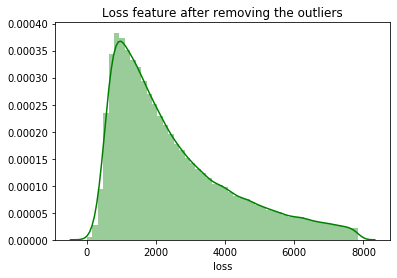

In [30]:
sns.distplot(dataset['loss'], kde = True, color = 'g')
plt.title('Loss feature after removing the outliers')
plt.savefig('Loss feature after removing the outliers.png')

Now we can see that the skewness has been reduced as compared to the plot before outliers.

Now we will remove the features which were highly correlated

In [31]:
dataset.drop(['cont9','cont10','cont12','cont13'], axis = 1, inplace = True)

In [32]:
print('The shape of the dataset after removing outliers and highly correlated features: {}'.format(dataset.shape))

The shape of the dataset after removing outliers and highly correlated features: (176764, 127)


In [33]:
#saving the data after removing outliers and highly correlated variables
dataset.to_pickle('G:/Self Case Study 1/allstate-claims-severity/data_after_outliers')

# [1.5] Observations from EDA:
- I have removed outliers from the data which is close to 6.13% of our entire data.
- Unfortunately, removing the outliers were not helpful in building the models as it was a loss of information and was also a part of my experimentation.
- I also experimented different featurization technique on categorical data which was not that helpful.
- As a part of my experimentation the different featurization techniques I used on categorical data are as follows:
- OneHotEncoding,TargetEncoder,OrdinalEncoder,MEstimateEncoder,BaseNEncoder.
- Among the above featurization techniques Ordinal encoding seemed to work pretty well but with some modifications and the idea for that modification was there on the Kaggle Forum of this competition which helped me alot/
- Now, for numerical features I tried different technique such as Polynomial features with different order,features obtained after PCA, logarithmic and different trignometric values,
- Among this features none of the features performed that well but box-cox features with some threshold value seem to worked fairly well. And thanks to the Kaggle Forum again for this brilliant ideas.
- I used combinations of randomly selected features and used my custom encoding function which returned ordinality with some modification.
- Now we will move to model building and the custom function used in model building in next session

# [2] Final Model for submission

In [1]:
import pandas as pd
import numpy as np
import sklearn
from datetime import datetime
import matplotlib
import joblib
import pickle

import matplotlib.pyplot as plt

from category_encoders import TargetEncoder,OrdinalEncoder,MEstimateEncoder,JamesSteinEncoder,HashingEncoder,HelmertEncoder
from category_encoders import CatBoostEncoder,BaseNEncoder,BackwardDifferenceEncoder
from mlxtend.regressor import StackingRegressor
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import os
from scipy.stats import skew, boxcox
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

## Methodology
- My methodology for this final submission wasfrom Kaggle discussion forum https://www.kaggle.com/brahma0545/encoding-feature-comb-modkzs-1108-72665
- I took the combination of randomly selected 35 features as it was computationally efficient
- In my earlier submission I have tried building my models without outliers, but after reading most of the kaggle forum discussion I realized removing outliers is causing loss of information and leading to a worst model.
- Infact, removing outliers didn't help me much si, I decided to keep them and build a model on top of the m by taking the log of loss value and adding a shift value of 200 which gave a good stability and avoided it from skewness
- As my data was highly skewed I munged the skewness by setting some threshold of 0.25
- According to the Kaggle Forum most of them have used a different objective function which worked fairly well for optimizing our loss function.
- The objective which was used is as below
- I will brief more about the objective function used below
- In a nutshell, it is y = c * abs(x) - c**2 * np.log(abs(x)/c + 1).
- Basically, it means that MAE is not continuously differentiable so we use some approximation.In Xgboost we build some complex objective function for better optimization results.By using the below function it uses the second order derivative for further approximation.

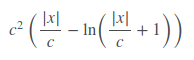

## [2.0] Data Preparation Function

In [2]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler

import itertools

shift = 200
COMB_FEATURE = 'cat80,cat87,cat57,cat12,cat79,cat10,cat7,cat89,cat2,cat72,' \
               'cat81,cat11,cat1,cat13,cat9,cat3,cat16,cat90,cat23,cat36,' \
               'cat73,cat103,cat40,cat28,cat111,cat6,cat76,cat50,cat5,' \
               'cat4,cat14,cat38,cat24,cat82,cat25'.split(',')

def encode(charcode):
    '''This function simply computes the ordinal value with some modifications'''
    r = 0
    ln = len(str(charcode))
    for i in range(ln):
        r += (ord(str(charcode)[i]) - ord('A') + 1) * 26 ** (ln - i - 1)
    return r

fair_constant = 2 #adding fair constant to avoid zero division error
def fair_obj(preds, dtrain):
    '''This function approximates the MAE loss function and returns two values
    which are grad and hess'''
    '''y = c * abs(x) - c**2 * np.log(abs(x)/c + 1)''' #found this from stackoverflow specially used for this competition
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

def xg_eval_mae(yhat, dtrain):
    '''This function is an extension if MAE as we are using log values of our loss function'''
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-shift,
                                      np.exp(yhat)-shift)

def mungeskewed(train, test, numeric_feats):
    '''This function returns box-cox transformed values with the original train shape'''
    ntrain = train.shape[0]
    test['loss'] = 0
    train_test = pd.concat((train, test)).reset_index(drop=True)
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[skewed_feats > 0.25]
    skewed_feats = skewed_feats.index

    for feats in skewed_feats:
        train_test[feats] = train_test[feats] + 1
        train_test[feats], lam = boxcox(train_test[feats])
    return train_test, ntrain


directory = '../input/'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')




def func_for_comb_feat(train,test):
    '''This function takes in train and test data and returns the combination of features'''

    if __name__ == "__main__":

        print('\nStarted')
        directory = '../input/'
        train = pd.read_csv('train.csv')
        test = pd.read_csv('test.csv')

        numeric_feats = [x for x in train.columns[1:-1] if 'cont' in x]
        categorical_feats = [x for x in train.columns[1:-1] if 'cat' in x]
        train_test, ntrain = mungeskewed(train, test, numeric_feats)

        print('')
        for comb in itertools.combinations(COMB_FEATURE, 2):
            feat = comb[0] + "_" + comb[1]
            train_test[feat] = train_test[comb[0]] + train_test[comb[1]]
            train_test[feat] = train_test[feat].apply(encode)
            print('Analyzing Columns:', feat)

        categorical_feats = [x for x in train_test.columns[1:] if 'cat' in x]

        print('')
        for col in categorical_feats:
            print('Analyzing Column:', col)
            train_test[col] = train_test[col].apply(encode)

        print(train_test[categorical_feats])
    return train_test
func_for_comb_feat(train,test)
#I have saved this train_test file in a pickle file in my previous notebook.
#So in this notebook I will be calling my file directly


Started

Analyzing Columns: cat80_cat87
Analyzing Columns: cat80_cat57
Analyzing Columns: cat80_cat12
Analyzing Columns: cat80_cat79
Analyzing Columns: cat80_cat10
Analyzing Columns: cat80_cat7
Analyzing Columns: cat80_cat89
Analyzing Columns: cat80_cat2
Analyzing Columns: cat80_cat72
Analyzing Columns: cat80_cat81
Analyzing Columns: cat80_cat11
Analyzing Columns: cat80_cat1
Analyzing Columns: cat80_cat13
Analyzing Columns: cat80_cat9
Analyzing Columns: cat80_cat3
Analyzing Columns: cat80_cat16
Analyzing Columns: cat80_cat90
Analyzing Columns: cat80_cat23
Analyzing Columns: cat80_cat36
Analyzing Columns: cat80_cat73
Analyzing Columns: cat80_cat103
Analyzing Columns: cat80_cat40
Analyzing Columns: cat80_cat28
Analyzing Columns: cat80_cat111
Analyzing Columns: cat80_cat6
Analyzing Columns: cat80_cat76
Analyzing Columns: cat80_cat50
Analyzing Columns: cat80_cat5
Analyzing Columns: cat80_cat4
Analyzing Columns: cat80_cat14
Analyzing Columns: cat80_cat38
Analyzing Columns: cat80_cat24
Anal

Analyzing Columns: cat2_cat82
Analyzing Columns: cat2_cat25
Analyzing Columns: cat72_cat81
Analyzing Columns: cat72_cat11
Analyzing Columns: cat72_cat1
Analyzing Columns: cat72_cat13
Analyzing Columns: cat72_cat9
Analyzing Columns: cat72_cat3
Analyzing Columns: cat72_cat16
Analyzing Columns: cat72_cat90
Analyzing Columns: cat72_cat23
Analyzing Columns: cat72_cat36
Analyzing Columns: cat72_cat73
Analyzing Columns: cat72_cat103
Analyzing Columns: cat72_cat40
Analyzing Columns: cat72_cat28
Analyzing Columns: cat72_cat111
Analyzing Columns: cat72_cat6
Analyzing Columns: cat72_cat76
Analyzing Columns: cat72_cat50
Analyzing Columns: cat72_cat5
Analyzing Columns: cat72_cat4
Analyzing Columns: cat72_cat14
Analyzing Columns: cat72_cat38
Analyzing Columns: cat72_cat24
Analyzing Columns: cat72_cat82
Analyzing Columns: cat72_cat25
Analyzing Columns: cat81_cat11
Analyzing Columns: cat81_cat1
Analyzing Columns: cat81_cat13
Analyzing Columns: cat81_cat9
Analyzing Columns: cat81_cat3
Analyzing Columns

Analyzing Columns: cat28_cat14
Analyzing Columns: cat28_cat38
Analyzing Columns: cat28_cat24
Analyzing Columns: cat28_cat82
Analyzing Columns: cat28_cat25
Analyzing Columns: cat111_cat6
Analyzing Columns: cat111_cat76
Analyzing Columns: cat111_cat50
Analyzing Columns: cat111_cat5
Analyzing Columns: cat111_cat4
Analyzing Columns: cat111_cat14
Analyzing Columns: cat111_cat38
Analyzing Columns: cat111_cat24
Analyzing Columns: cat111_cat82
Analyzing Columns: cat111_cat25
Analyzing Columns: cat6_cat76
Analyzing Columns: cat6_cat50
Analyzing Columns: cat6_cat5
Analyzing Columns: cat6_cat4
Analyzing Columns: cat6_cat14
Analyzing Columns: cat6_cat38
Analyzing Columns: cat6_cat24
Analyzing Columns: cat6_cat82
Analyzing Columns: cat6_cat25
Analyzing Columns: cat76_cat50
Analyzing Columns: cat76_cat5
Analyzing Columns: cat76_cat4
Analyzing Columns: cat76_cat14
Analyzing Columns: cat76_cat38
Analyzing Columns: cat76_cat24
Analyzing Columns: cat76_cat82
Analyzing Columns: cat76_cat25
Analyzing Colu

Analyzing Column: cat12_cat6
Analyzing Column: cat12_cat76
Analyzing Column: cat12_cat50
Analyzing Column: cat12_cat5
Analyzing Column: cat12_cat4
Analyzing Column: cat12_cat14
Analyzing Column: cat12_cat38
Analyzing Column: cat12_cat24
Analyzing Column: cat12_cat82
Analyzing Column: cat12_cat25
Analyzing Column: cat79_cat10
Analyzing Column: cat79_cat7
Analyzing Column: cat79_cat89
Analyzing Column: cat79_cat2
Analyzing Column: cat79_cat72
Analyzing Column: cat79_cat81
Analyzing Column: cat79_cat11
Analyzing Column: cat79_cat1
Analyzing Column: cat79_cat13
Analyzing Column: cat79_cat9
Analyzing Column: cat79_cat3
Analyzing Column: cat79_cat16
Analyzing Column: cat79_cat90
Analyzing Column: cat79_cat23
Analyzing Column: cat79_cat36
Analyzing Column: cat79_cat73
Analyzing Column: cat79_cat103
Analyzing Column: cat79_cat40
Analyzing Column: cat79_cat28
Analyzing Column: cat79_cat111
Analyzing Column: cat79_cat6
Analyzing Column: cat79_cat76
Analyzing Column: cat79_cat50
Analyzing Column:

Analyzing Column: cat9_cat5
Analyzing Column: cat9_cat4
Analyzing Column: cat9_cat14
Analyzing Column: cat9_cat38
Analyzing Column: cat9_cat24
Analyzing Column: cat9_cat82
Analyzing Column: cat9_cat25
Analyzing Column: cat3_cat16
Analyzing Column: cat3_cat90
Analyzing Column: cat3_cat23
Analyzing Column: cat3_cat36
Analyzing Column: cat3_cat73
Analyzing Column: cat3_cat103
Analyzing Column: cat3_cat40
Analyzing Column: cat3_cat28
Analyzing Column: cat3_cat111
Analyzing Column: cat3_cat6
Analyzing Column: cat3_cat76
Analyzing Column: cat3_cat50
Analyzing Column: cat3_cat5
Analyzing Column: cat3_cat4
Analyzing Column: cat3_cat14
Analyzing Column: cat3_cat38
Analyzing Column: cat3_cat24
Analyzing Column: cat3_cat82
Analyzing Column: cat3_cat25
Analyzing Column: cat16_cat90
Analyzing Column: cat16_cat23
Analyzing Column: cat16_cat36
Analyzing Column: cat16_cat73
Analyzing Column: cat16_cat103
Analyzing Column: cat16_cat40
Analyzing Column: cat16_cat28
Analyzing Column: cat16_cat111
Analyzi

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  ...  \
0            1     1     2     1     2     1     1     1     1     2  ...   
1            2     1     2     1     1     1     1     1     1     2  ...   
2            5     1     2     1     1     2     1     1     1     2  ...   
3           10     2     2     1     2     1     1     1     1     2  ...   
4           11     1     2     1     2     1     1     1     1     2  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
313859  587617     1     1     1     2     1     1     1     1     1  ...   
313860  587621     1     1     1     1     2     2     1     2     1  ...   
313861  587627     2     2     1     1     2     1     1     1     2  ...   
313862  587629     1     1     1     1     1     2     1     2     1  ...   
313863  587634     1     2     1     1     1     1     1     1     2  ...   

        cat14_cat38  cat14_cat24  cat14_cat82  cat14_cat25  cat38_cat24  \
0              -373         -373         -372         -373         -373   
1              -373         -373         -373         -373         -373   
2              -373         -373         -372         -373         -373   
3              -373         -373         -354         -373         -373   
4              -373         -373         -372         -373         -373   
...             ...          ...          ...          ...          ...   
313859         -373         -373         -372         -373         -373   
313860         -373         -373         -372         -373         -373   
313861         -373         -373         -372         -373         -373   
313862         -373         -373         -372         -373         -373   
313863         -373         -373         -372         -373         -373   

        cat38_cat82  cat38_cat25  cat24_cat82  cat24_cat25  cat82_cat25  
0              -372         -373         -372         -373         -299  
1              -373         -373         -373         -373         -373  
2              -372         -373         -372         -373         -299  
3              -354         -373         -354         -373       -10567  
4              -372         -373         -372         -373         -299  
...             ...          ...          ...          ...          ...  
313859         -372         -373         -372         -373         -299  
313860         -372         -373         -372         -373         -299  
313861         -372         -373         -372         -373         -299  
313862         -372         -373         -372         -373         -299  
313863         -372         -373         -372         -373         -299  

[313864 rows x 727 columns]

## [2.1] XGBoostRegressor with 7 Folds

In [ ]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb

from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
import itertools

ntrain = 188318
shift = 200
COMB_FEATURE = 'cat80,cat87,cat57,cat12,cat79,cat10,cat7,cat89,cat2,cat72,' \
               'cat81,cat11,cat1,cat13,cat9,cat3,cat16,cat90,cat23,cat36,' \
               'cat73,cat103,cat40,cat28,cat111,cat6,cat76,cat50,cat5,' \
               'cat4,cat14,cat38,cat24,cat82,cat25'.split(',')

def encode(charcode):
    '''This function simply computes the ordinal value with some modifications'''
    r = 0
    ln = len(str(charcode))
    for i in range(ln):
        r += (ord(str(charcode)[i]) - ord('A') + 1) * 26 ** (ln - i - 1)
    return r

fair_constant = 2 #adding fair constant to avoid zero division error
def fair_obj(preds, dtrain):
    '''This function approximates the MAE loss function and returns two values
    which are grad and hess'''
    '''y = c * abs(x) - c**2 * np.log(abs(x)/c + 1)''' #found this from stackoverflow specially used for this competition
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

def xg_eval_mae(yhat, dtrain):
    '''This function is an extension if MAE as we are using log values of our loss function'''
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-shift,
                                      np.exp(yhat)-shift)

def mungeskewed(train, test, numeric_feats):
    '''This function returns box-cox transformed values with the original train shape'''
    ntrain = train.shape[0]
    test['loss'] = 0
    train_test = pd.concat((train, test)).reset_index(drop=True)
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[skewed_feats > 0.25]
    skewed_feats = skewed_feats.index

    for feats in skewed_feats:
        train_test[feats] = train_test[feats] + 1
        train_test[feats], lam = boxcox(train_test[feats])
    return train_test, ntrain

train_test = pd.read_pickle('train_test')

def func_xgboostreg(train_test,n_folds = 7):
    '''This function takes in processed data and returns eval MAE with saved csv file for the submission'''

    if __name__ == "__main__":

        #we are directly calling the combined features file as it will take less compute 
        #power
        train_test = pd.read_pickle('train_test') 

        numeric_feats = [x for x in train_test.columns[1:-1] if 'cont' in x]
        categorical_feats = [x for x in train_test.columns[1:-1] if 'cat' in x]
        #train_test, ntrain = mungeskewed(train, test, numeric_feats)

        categorical_feats = [x for x in train_test.columns[1:] if 'cat' in x]

        ss = StandardScaler()
        train_test[numeric_feats] = \
            ss.fit_transform(train_test[numeric_feats].values)

        train_x = train_test.iloc[:ntrain, :].copy()
        test_x = train_test.iloc[ntrain:, :].copy()

        print('\nMedian Loss:', train_x.loss.median())
        print('Mean Loss:', train_x.loss.mean())

        ids = pd.read_csv('test.csv')['id']
        train_y = np.log(train_x['loss'] + shift)
        train_x = train_x.drop(['loss','id'], axis=1)
        test_x = test_x.drop(['loss','id'], axis=1)

        n_folds = 7
        cv_sum = 0
        early_stopping = 100
        fpred = []
        xgb_rounds = []

        d_train_full = xgb.DMatrix(train_x, label=train_y)
        d_test = xgb.DMatrix(test_x)
        # https://stackoverflow.com/a/48641547
        kf = KFold(n_splits=7)
        for i, (train_index, test_index) in enumerate(kf.split(train_x)):
            print('\n Fold %d' % (i+1))
            X_train, X_val = train_x.iloc[train_index], train_x.iloc[test_index]
            y_train, y_val = train_y.iloc[train_index], train_y.iloc[test_index]

            rand_state = 2016

            params = {
                'seed': 0,
                'colsample_bytree': 0.7,
                'silent': 1,
                'subsample': 0.7,
                'learning_rate': 0.03,
                'objective': 'reg:linear',
                'max_depth': 12,
                'min_child_weight': 100,
                'booster': 'gbtree'
                }

            d_train = xgb.DMatrix(X_train, label=y_train)
            d_valid = xgb.DMatrix(X_val, label=y_val)
            watchlist = [(d_train, 'train'), (d_valid, 'eval')]

            clf = xgb.train(params,
                        d_train,
                        100000,
                        watchlist,
                        early_stopping_rounds=50,
                        obj=fair_obj,
                        feval=xg_eval_mae)

            xgb_rounds.append(clf.best_iteration)
            scores_val = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
            cv_score = mean_absolute_error(np.exp(y_val), np.exp(scores_val))
            print('eval-MAE: %.6f' % cv_score)
            y_pred = np.exp(clf.predict(d_test, ntree_limit=clf.best_ntree_limit)) - shift

            if i > 0:
                fpred = pred + y_pred
            else:
                fpred = y_pred
            pred = fpred
            cv_sum = cv_sum + cv_score

        mpred = pred / n_folds
        score = cv_sum / n_folds
        print('Average eval-MAE: %.6f' % score)
        n_rounds = int(np.mean(xgb_rounds))

        print("Writing results")
        result = pd.DataFrame(mpred, columns=['loss'])
        result["id"] = ids
        result = result.set_index("id")
        print("%d-fold average prediction:" % n_folds)

        now = datetime.now()
        score = str(round((cv_sum / n_folds), 6))
        sub_file = 'submission_7fold-average-xgb_fairobj_' + str(score) + '_' + str(
            now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
        print("Writing submission: %s" % sub_file)
        result.to_csv(sub_file, index=True, index_label='id')
        joblib.dump(clf,'xgboost_with_7folds')
func_xgboostreg(train_test,n_folds = 7)


Median Loss: 2115.5699999999997
Mean Loss: 3037.3376856699792

 Fold 1
[0]	train-rmse:6.32838	eval-rmse:6.32811	train-mae:3231.96	eval-mae:3237.8
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 50 rounds.
[1]	train-rmse:5.55713	eval-rmse:5.55652	train-mae:3226.57	eval-mae:3232.4
[2]	train-rmse:4.94676	eval-rmse:4.94575	train-mae:3217.98	eval-mae:3223.8
[3]	train-rmse:4.45042	eval-rmse:4.44923	train-mae:3205.7	eval-mae:3211.49
[4]	train-rmse:4.03888	eval-rmse:4.03767	train-mae:3189.52	eval-mae:3195.28
[5]	train-rmse:3.6917	eval-rmse:3.69033	train-mae:3169.34	eval-mae:3175.06
[6]	train-rmse:3.39481	eval-rmse:3.39325	train-mae:3145.28	eval-mae:3150.93
[7]	train-rmse:3.13838	eval-rmse:3.13662	train-mae:3117.57	eval-mae:3123.13
[8]	train-rmse:2.91405	eval-rmse:2.91224	train-mae:3086.35	eval-mae:3091.81
[9]	train-rmse:2.71668	eval-rmse:2.71479	train-mae:3052.18	eval-mae:3057.51
[10]	train-rmse:2.54207	eval-rms

[103]	train-rmse:0.474708	eval-rmse:0.490341	train-mae:1142.24	eval-mae:1187.07
[104]	train-rmse:0.474083	eval-rmse:0.489787	train-mae:1140.42	eval-mae:1185.62
[105]	train-rmse:0.473516	eval-rmse:0.489297	train-mae:1138.75	eval-mae:1184.27
[106]	train-rmse:0.473027	eval-rmse:0.488882	train-mae:1137.31	eval-mae:1183.17
[107]	train-rmse:0.472539	eval-rmse:0.48845	train-mae:1135.82	eval-mae:1182.01
[108]	train-rmse:0.471971	eval-rmse:0.488042	train-mae:1134.11	eval-mae:1180.82
[109]	train-rmse:0.471436	eval-rmse:0.487664	train-mae:1132.5	eval-mae:1179.79
[110]	train-rmse:0.470964	eval-rmse:0.487315	train-mae:1131.11	eval-mae:1178.82
[111]	train-rmse:0.470388	eval-rmse:0.486939	train-mae:1129.46	eval-mae:1177.7
[112]	train-rmse:0.469888	eval-rmse:0.486587	train-mae:1128.03	eval-mae:1176.76
[113]	train-rmse:0.469478	eval-rmse:0.48625	train-mae:1126.76	eval-mae:1175.82
[114]	train-rmse:0.469089	eval-rmse:0.485942	train-mae:1125.61	eval-mae:1174.97
[115]	train-rmse:0.468623	eval-rmse:0.485634

[206]	train-rmse:0.454195	eval-rmse:0.478343	train-mae:1078.56	eval-mae:1150.69
[207]	train-rmse:0.454062	eval-rmse:0.478306	train-mae:1078.22	eval-mae:1150.6
[208]	train-rmse:0.453947	eval-rmse:0.478279	train-mae:1077.89	eval-mae:1150.51
[209]	train-rmse:0.453858	eval-rmse:0.478256	train-mae:1077.57	eval-mae:1150.44
[210]	train-rmse:0.453799	eval-rmse:0.478237	train-mae:1077.36	eval-mae:1150.37
[211]	train-rmse:0.453695	eval-rmse:0.4782	train-mae:1077.08	eval-mae:1150.27
[212]	train-rmse:0.453592	eval-rmse:0.478184	train-mae:1076.78	eval-mae:1150.16
[213]	train-rmse:0.453498	eval-rmse:0.478158	train-mae:1076.45	eval-mae:1150.08
[214]	train-rmse:0.453406	eval-rmse:0.478139	train-mae:1076.19	eval-mae:1150.01
[215]	train-rmse:0.453354	eval-rmse:0.478118	train-mae:1076.03	eval-mae:1149.92
[216]	train-rmse:0.453278	eval-rmse:0.478095	train-mae:1075.81	eval-mae:1149.86
[217]	train-rmse:0.453215	eval-rmse:0.478081	train-mae:1075.64	eval-mae:1149.81
[218]	train-rmse:0.453149	eval-rmse:0.47805

[309]	train-rmse:0.446622	eval-rmse:0.47668	train-mae:1056.17	eval-mae:1145.24
[310]	train-rmse:0.446545	eval-rmse:0.476663	train-mae:1055.97	eval-mae:1145.25
[311]	train-rmse:0.446512	eval-rmse:0.476658	train-mae:1055.89	eval-mae:1145.24
[312]	train-rmse:0.44646	eval-rmse:0.47666	train-mae:1055.75	eval-mae:1145.23
[313]	train-rmse:0.446396	eval-rmse:0.476633	train-mae:1055.58	eval-mae:1145.17
[314]	train-rmse:0.446305	eval-rmse:0.476625	train-mae:1055.29	eval-mae:1145.09
[315]	train-rmse:0.446206	eval-rmse:0.476617	train-mae:1055.02	eval-mae:1145.05
[316]	train-rmse:0.446172	eval-rmse:0.476609	train-mae:1054.9	eval-mae:1145.01
[317]	train-rmse:0.446098	eval-rmse:0.476603	train-mae:1054.7	eval-mae:1145.01
[318]	train-rmse:0.446073	eval-rmse:0.476591	train-mae:1054.61	eval-mae:1144.97
[319]	train-rmse:0.445982	eval-rmse:0.476563	train-mae:1054.37	eval-mae:1144.87
[320]	train-rmse:0.445885	eval-rmse:0.476542	train-mae:1054.11	eval-mae:1144.79
[321]	train-rmse:0.445796	eval-rmse:0.476521	

[413]	train-rmse:0.440783	eval-rmse:0.47602	train-mae:1039.13	eval-mae:1142.79
[414]	train-rmse:0.440754	eval-rmse:0.476019	train-mae:1039.03	eval-mae:1142.77
[415]	train-rmse:0.440709	eval-rmse:0.476006	train-mae:1038.9	eval-mae:1142.75
[416]	train-rmse:0.440668	eval-rmse:0.476004	train-mae:1038.78	eval-mae:1142.74
[417]	train-rmse:0.44064	eval-rmse:0.475996	train-mae:1038.7	eval-mae:1142.72
[418]	train-rmse:0.440564	eval-rmse:0.475997	train-mae:1038.49	eval-mae:1142.72
[419]	train-rmse:0.440519	eval-rmse:0.475987	train-mae:1038.37	eval-mae:1142.69
[420]	train-rmse:0.440457	eval-rmse:0.475983	train-mae:1038.19	eval-mae:1142.69
[421]	train-rmse:0.440388	eval-rmse:0.475984	train-mae:1038.01	eval-mae:1142.72
[422]	train-rmse:0.440326	eval-rmse:0.475965	train-mae:1037.82	eval-mae:1142.71
[423]	train-rmse:0.440277	eval-rmse:0.475971	train-mae:1037.67	eval-mae:1142.75
[424]	train-rmse:0.440219	eval-rmse:0.475971	train-mae:1037.5	eval-mae:1142.76
[425]	train-rmse:0.44016	eval-rmse:0.475965	t

[517]	train-rmse:0.435329	eval-rmse:0.475615	train-mae:1023.46	eval-mae:1141.11
[518]	train-rmse:0.435304	eval-rmse:0.475618	train-mae:1023.4	eval-mae:1141.13
[519]	train-rmse:0.435221	eval-rmse:0.475611	train-mae:1023.16	eval-mae:1141.12
[520]	train-rmse:0.435194	eval-rmse:0.475602	train-mae:1023.06	eval-mae:1141.08
[521]	train-rmse:0.435099	eval-rmse:0.475608	train-mae:1022.81	eval-mae:1141.05
[522]	train-rmse:0.435083	eval-rmse:0.475608	train-mae:1022.77	eval-mae:1141.04
[523]	train-rmse:0.434991	eval-rmse:0.475597	train-mae:1022.52	eval-mae:1141.01
[524]	train-rmse:0.434925	eval-rmse:0.475601	train-mae:1022.35	eval-mae:1141.03
[525]	train-rmse:0.434897	eval-rmse:0.475605	train-mae:1022.26	eval-mae:1141.04
[526]	train-rmse:0.434854	eval-rmse:0.4756	train-mae:1022.12	eval-mae:1141.01
[527]	train-rmse:0.434797	eval-rmse:0.475589	train-mae:1021.92	eval-mae:1140.99
[528]	train-rmse:0.434766	eval-rmse:0.475586	train-mae:1021.81	eval-mae:1140.97
[529]	train-rmse:0.434712	eval-rmse:0.47557

[620]	train-rmse:0.430454	eval-rmse:0.475405	train-mae:1009.45	eval-mae:1139.73
[621]	train-rmse:0.430408	eval-rmse:0.475399	train-mae:1009.34	eval-mae:1139.69
[622]	train-rmse:0.430392	eval-rmse:0.475401	train-mae:1009.29	eval-mae:1139.68
[623]	train-rmse:0.430375	eval-rmse:0.475402	train-mae:1009.23	eval-mae:1139.67
[624]	train-rmse:0.4303	eval-rmse:0.475411	train-mae:1009.05	eval-mae:1139.69
[625]	train-rmse:0.430288	eval-rmse:0.475408	train-mae:1009.01	eval-mae:1139.67
[626]	train-rmse:0.430243	eval-rmse:0.475403	train-mae:1008.88	eval-mae:1139.67
[627]	train-rmse:0.430183	eval-rmse:0.475404	train-mae:1008.69	eval-mae:1139.63
[628]	train-rmse:0.430124	eval-rmse:0.475406	train-mae:1008.5	eval-mae:1139.64
[629]	train-rmse:0.430055	eval-rmse:0.475406	train-mae:1008.33	eval-mae:1139.62
[630]	train-rmse:0.43	eval-rmse:0.475404	train-mae:1008.16	eval-mae:1139.58
[631]	train-rmse:0.429983	eval-rmse:0.475414	train-mae:1008.1	eval-mae:1139.59
[632]	train-rmse:0.429956	eval-rmse:0.475423	tra

[724]	train-rmse:0.426011	eval-rmse:0.475399	train-mae:996.786	eval-mae:1139.38
[725]	train-rmse:0.425955	eval-rmse:0.475394	train-mae:996.638	eval-mae:1139.39
[726]	train-rmse:0.425887	eval-rmse:0.475384	train-mae:996.417	eval-mae:1139.31
[727]	train-rmse:0.425856	eval-rmse:0.475373	train-mae:996.316	eval-mae:1139.3
[728]	train-rmse:0.425785	eval-rmse:0.475364	train-mae:996.11	eval-mae:1139.3
[729]	train-rmse:0.425715	eval-rmse:0.475386	train-mae:995.951	eval-mae:1139.37
[730]	train-rmse:0.425666	eval-rmse:0.475378	train-mae:995.811	eval-mae:1139.34
[731]	train-rmse:0.425611	eval-rmse:0.475374	train-mae:995.632	eval-mae:1139.32
[732]	train-rmse:0.425569	eval-rmse:0.475366	train-mae:995.509	eval-mae:1139.28
[733]	train-rmse:0.425553	eval-rmse:0.475367	train-mae:995.47	eval-mae:1139.3
[734]	train-rmse:0.425514	eval-rmse:0.47537	train-mae:995.349	eval-mae:1139.3
[735]	train-rmse:0.425466	eval-rmse:0.47537	train-mae:995.153	eval-mae:1139.29
[736]	train-rmse:0.425417	eval-rmse:0.475363	tra

[16]	train-rmse:1.80867	eval-rmse:1.80663	train-mae:2759.8	eval-mae:2755.14
[17]	train-rmse:1.72219	eval-rmse:1.72021	train-mae:2713.83	eval-mae:2709.16
[18]	train-rmse:1.64263	eval-rmse:1.64074	train-mae:2667.42	eval-mae:2662.72
[19]	train-rmse:1.56953	eval-rmse:1.56776	train-mae:2620.95	eval-mae:2616.2
[20]	train-rmse:1.50205	eval-rmse:1.50036	train-mae:2574.5	eval-mae:2569.67
[21]	train-rmse:1.43965	eval-rmse:1.43809	train-mae:2528.21	eval-mae:2523.35
[22]	train-rmse:1.38192	eval-rmse:1.38047	train-mae:2482.42	eval-mae:2477.56
[23]	train-rmse:1.32815	eval-rmse:1.32689	train-mae:2436.8	eval-mae:2431.94
[24]	train-rmse:1.27825	eval-rmse:1.27711	train-mae:2392	eval-mae:2387.15
[25]	train-rmse:1.23171	eval-rmse:1.23072	train-mae:2347.7	eval-mae:2342.88
[26]	train-rmse:1.18816	eval-rmse:1.18731	train-mae:2304.05	eval-mae:2299.21
[27]	train-rmse:1.1475	eval-rmse:1.14688	train-mae:2261.21	eval-mae:2256.5
[28]	train-rmse:1.10965	eval-rmse:1.10921	train-mae:2219.46	eval-mae:2214.82
[29]	trai

[121]	train-rmse:0.466915	eval-rmse:0.483916	train-mae:1120.65	eval-mae:1156.96
[122]	train-rmse:0.466633	eval-rmse:0.483724	train-mae:1119.76	eval-mae:1156.4
[123]	train-rmse:0.466353	eval-rmse:0.483557	train-mae:1118.85	eval-mae:1155.95
[124]	train-rmse:0.466101	eval-rmse:0.483387	train-mae:1118.03	eval-mae:1155.43
[125]	train-rmse:0.465873	eval-rmse:0.483222	train-mae:1117.29	eval-mae:1154.92
[126]	train-rmse:0.465674	eval-rmse:0.483091	train-mae:1116.59	eval-mae:1154.47
[127]	train-rmse:0.465332	eval-rmse:0.482921	train-mae:1115.56	eval-mae:1154.01
[128]	train-rmse:0.465082	eval-rmse:0.482744	train-mae:1114.75	eval-mae:1153.49
[129]	train-rmse:0.464828	eval-rmse:0.482624	train-mae:1113.96	eval-mae:1153.11
[130]	train-rmse:0.464485	eval-rmse:0.482437	train-mae:1112.95	eval-mae:1152.6
[131]	train-rmse:0.464218	eval-rmse:0.482293	train-mae:1112.06	eval-mae:1152.13
[132]	train-rmse:0.463973	eval-rmse:0.48215	train-mae:1111.23	eval-mae:1151.73
[133]	train-rmse:0.463841	eval-rmse:0.48205

[224]	train-rmse:0.452784	eval-rmse:0.47799	train-mae:1075.57	eval-mae:1138.7
[225]	train-rmse:0.452701	eval-rmse:0.477972	train-mae:1075.34	eval-mae:1138.63
[226]	train-rmse:0.452554	eval-rmse:0.477926	train-mae:1074.88	eval-mae:1138.48
[227]	train-rmse:0.452524	eval-rmse:0.477911	train-mae:1074.77	eval-mae:1138.45
[228]	train-rmse:0.452415	eval-rmse:0.477882	train-mae:1074.41	eval-mae:1138.38
[229]	train-rmse:0.452268	eval-rmse:0.477847	train-mae:1073.99	eval-mae:1138.24
[230]	train-rmse:0.452222	eval-rmse:0.47783	train-mae:1073.79	eval-mae:1138.2
[231]	train-rmse:0.45217	eval-rmse:0.47781	train-mae:1073.57	eval-mae:1138.17
[232]	train-rmse:0.452063	eval-rmse:0.477789	train-mae:1073.27	eval-mae:1138.09
[233]	train-rmse:0.452013	eval-rmse:0.477775	train-mae:1073.09	eval-mae:1138.02
[234]	train-rmse:0.451946	eval-rmse:0.477743	train-mae:1072.93	eval-mae:1137.94
[235]	train-rmse:0.451885	eval-rmse:0.477717	train-mae:1072.75	eval-mae:1137.84
[236]	train-rmse:0.45178	eval-rmse:0.477699	tr

[327]	train-rmse:0.445234	eval-rmse:0.476543	train-mae:1053.43	eval-mae:1134.44
[328]	train-rmse:0.445177	eval-rmse:0.476548	train-mae:1053.27	eval-mae:1134.46
[329]	train-rmse:0.445127	eval-rmse:0.476551	train-mae:1053.1	eval-mae:1134.5
[330]	train-rmse:0.444981	eval-rmse:0.476525	train-mae:1052.68	eval-mae:1134.44
[331]	train-rmse:0.444886	eval-rmse:0.476523	train-mae:1052.4	eval-mae:1134.42
[332]	train-rmse:0.444835	eval-rmse:0.476521	train-mae:1052.27	eval-mae:1134.42
[333]	train-rmse:0.444792	eval-rmse:0.476512	train-mae:1052.11	eval-mae:1134.4
[334]	train-rmse:0.444732	eval-rmse:0.476496	train-mae:1051.94	eval-mae:1134.4
[335]	train-rmse:0.444698	eval-rmse:0.476479	train-mae:1051.85	eval-mae:1134.34
[336]	train-rmse:0.444663	eval-rmse:0.476468	train-mae:1051.76	eval-mae:1134.3
[337]	train-rmse:0.444586	eval-rmse:0.476462	train-mae:1051.57	eval-mae:1134.25
[338]	train-rmse:0.444536	eval-rmse:0.476452	train-mae:1051.4	eval-mae:1134.24
[339]	train-rmse:0.444492	eval-rmse:0.476445	tr

[430]	train-rmse:0.439229	eval-rmse:0.475884	train-mae:1035.9	eval-mae:1132.24
[431]	train-rmse:0.439169	eval-rmse:0.475883	train-mae:1035.67	eval-mae:1132.23
[432]	train-rmse:0.439102	eval-rmse:0.475872	train-mae:1035.49	eval-mae:1132.2
[433]	train-rmse:0.439071	eval-rmse:0.475867	train-mae:1035.42	eval-mae:1132.19
[434]	train-rmse:0.439014	eval-rmse:0.475847	train-mae:1035.23	eval-mae:1132.13
[435]	train-rmse:0.43897	eval-rmse:0.475854	train-mae:1035.1	eval-mae:1132.12
[436]	train-rmse:0.438918	eval-rmse:0.475854	train-mae:1034.95	eval-mae:1132.11
[437]	train-rmse:0.438872	eval-rmse:0.475848	train-mae:1034.81	eval-mae:1132.08
[438]	train-rmse:0.438853	eval-rmse:0.475843	train-mae:1034.75	eval-mae:1132.09
[439]	train-rmse:0.438797	eval-rmse:0.47583	train-mae:1034.59	eval-mae:1132.05
[440]	train-rmse:0.438709	eval-rmse:0.475831	train-mae:1034.35	eval-mae:1132.05
[441]	train-rmse:0.438626	eval-rmse:0.475826	train-mae:1034.14	eval-mae:1132.05
[442]	train-rmse:0.438594	eval-rmse:0.475828	

[534]	train-rmse:0.433702	eval-rmse:0.475512	train-mae:1019.67	eval-mae:1131.3
[535]	train-rmse:0.433668	eval-rmse:0.475509	train-mae:1019.57	eval-mae:1131.26
[536]	train-rmse:0.4336	eval-rmse:0.475505	train-mae:1019.4	eval-mae:1131.22
[537]	train-rmse:0.433561	eval-rmse:0.475507	train-mae:1019.29	eval-mae:1131.24
[538]	train-rmse:0.433513	eval-rmse:0.475508	train-mae:1019.15	eval-mae:1131.25
[539]	train-rmse:0.433462	eval-rmse:0.475503	train-mae:1019.01	eval-mae:1131.24
[540]	train-rmse:0.433406	eval-rmse:0.475502	train-mae:1018.82	eval-mae:1131.19
[541]	train-rmse:0.433373	eval-rmse:0.475494	train-mae:1018.71	eval-mae:1131.16
[542]	train-rmse:0.433319	eval-rmse:0.475489	train-mae:1018.52	eval-mae:1131.15
[543]	train-rmse:0.433269	eval-rmse:0.475476	train-mae:1018.35	eval-mae:1131.07
[544]	train-rmse:0.433249	eval-rmse:0.475467	train-mae:1018.29	eval-mae:1131.06
[545]	train-rmse:0.433191	eval-rmse:0.475472	train-mae:1018.14	eval-mae:1131.05
[546]	train-rmse:0.43312	eval-rmse:0.475473	

[638]	train-rmse:0.428983	eval-rmse:0.475413	train-mae:1005.83	eval-mae:1130.8
[639]	train-rmse:0.428938	eval-rmse:0.475416	train-mae:1005.69	eval-mae:1130.78
[640]	train-rmse:0.428852	eval-rmse:0.475409	train-mae:1005.44	eval-mae:1130.74
[641]	train-rmse:0.428825	eval-rmse:0.475398	train-mae:1005.37	eval-mae:1130.71
[642]	train-rmse:0.428768	eval-rmse:0.475404	train-mae:1005.22	eval-mae:1130.74
[643]	train-rmse:0.428723	eval-rmse:0.475388	train-mae:1005.08	eval-mae:1130.72
[644]	train-rmse:0.428652	eval-rmse:0.475374	train-mae:1004.89	eval-mae:1130.7
[645]	train-rmse:0.42863	eval-rmse:0.475375	train-mae:1004.84	eval-mae:1130.7
[646]	train-rmse:0.428578	eval-rmse:0.475376	train-mae:1004.69	eval-mae:1130.68
[647]	train-rmse:0.428534	eval-rmse:0.475379	train-mae:1004.57	eval-mae:1130.71
[648]	train-rmse:0.428462	eval-rmse:0.47538	train-mae:1004.37	eval-mae:1130.67
[649]	train-rmse:0.428448	eval-rmse:0.475378	train-mae:1004.3	eval-mae:1130.66
[650]	train-rmse:0.428387	eval-rmse:0.475386	t

[742]	train-rmse:0.424232	eval-rmse:0.475249	train-mae:992.011	eval-mae:1130.32
[743]	train-rmse:0.424144	eval-rmse:0.475235	train-mae:991.742	eval-mae:1130.3
[744]	train-rmse:0.424094	eval-rmse:0.475231	train-mae:991.597	eval-mae:1130.31
[745]	train-rmse:0.424051	eval-rmse:0.47522	train-mae:991.477	eval-mae:1130.25
[746]	train-rmse:0.424035	eval-rmse:0.475214	train-mae:991.411	eval-mae:1130.22
[747]	train-rmse:0.423983	eval-rmse:0.475218	train-mae:991.267	eval-mae:1130.23
[748]	train-rmse:0.423963	eval-rmse:0.475219	train-mae:991.207	eval-mae:1130.25
[749]	train-rmse:0.423933	eval-rmse:0.475222	train-mae:991.1	eval-mae:1130.29
[750]	train-rmse:0.423878	eval-rmse:0.475214	train-mae:990.966	eval-mae:1130.23
[751]	train-rmse:0.423811	eval-rmse:0.475218	train-mae:990.778	eval-mae:1130.26
[752]	train-rmse:0.423753	eval-rmse:0.475219	train-mae:990.629	eval-mae:1130.27
[753]	train-rmse:0.423723	eval-rmse:0.475212	train-mae:990.539	eval-mae:1130.25
[754]	train-rmse:0.423675	eval-rmse:0.475212

[35]	train-rmse:0.901745	eval-rmse:0.90329	train-mae:1953.07	eval-mae:1953.44
[36]	train-rmse:0.878521	eval-rmse:0.880159	train-mae:1919.08	eval-mae:1919.72
[37]	train-rmse:0.856535	eval-rmse:0.858285	train-mae:1886.03	eval-mae:1886.99
[38]	train-rmse:0.835831	eval-rmse:0.837645	train-mae:1854.2	eval-mae:1855.43
[39]	train-rmse:0.816293	eval-rmse:0.818191	train-mae:1823.42	eval-mae:1824.97
[40]	train-rmse:0.797709	eval-rmse:0.799774	train-mae:1793.53	eval-mae:1795.48
[41]	train-rmse:0.780213	eval-rmse:0.782432	train-mae:1764.8	eval-mae:1767.11
[42]	train-rmse:0.763625	eval-rmse:0.766012	train-mae:1737.01	eval-mae:1739.71
[43]	train-rmse:0.747874	eval-rmse:0.750364	train-mae:1710.05	eval-mae:1713.05
[44]	train-rmse:0.73299	eval-rmse:0.735659	train-mae:1684.18	eval-mae:1687.51
[45]	train-rmse:0.718948	eval-rmse:0.721768	train-mae:1659.58	eval-mae:1663.3
[46]	train-rmse:0.705596	eval-rmse:0.708623	train-mae:1635.65	eval-mae:1639.8
[47]	train-rmse:0.693048	eval-rmse:0.696232	train-mae:1612

[139]	train-rmse:0.463445	eval-rmse:0.476445	train-mae:1107.72	eval-mae:1143.37
[140]	train-rmse:0.463337	eval-rmse:0.476356	train-mae:1107.32	eval-mae:1143.07
[141]	train-rmse:0.463146	eval-rmse:0.476221	train-mae:1106.66	eval-mae:1142.6
[142]	train-rmse:0.462958	eval-rmse:0.476101	train-mae:1106.02	eval-mae:1142.21
[143]	train-rmse:0.462769	eval-rmse:0.476008	train-mae:1105.41	eval-mae:1141.92
[144]	train-rmse:0.462568	eval-rmse:0.475922	train-mae:1104.8	eval-mae:1141.58
[145]	train-rmse:0.462414	eval-rmse:0.475844	train-mae:1104.32	eval-mae:1141.33
[146]	train-rmse:0.462298	eval-rmse:0.475757	train-mae:1103.9	eval-mae:1141.05
[147]	train-rmse:0.462053	eval-rmse:0.475646	train-mae:1103.17	eval-mae:1140.75
[148]	train-rmse:0.461817	eval-rmse:0.475498	train-mae:1102.44	eval-mae:1140.26
[149]	train-rmse:0.461696	eval-rmse:0.475442	train-mae:1102.03	eval-mae:1140.03
[150]	train-rmse:0.461509	eval-rmse:0.475336	train-mae:1101.44	eval-mae:1139.64
[151]	train-rmse:0.461388	eval-rmse:0.47526

[243]	train-rmse:0.451952	eval-rmse:0.472177	train-mae:1071.96	eval-mae:1129
[244]	train-rmse:0.451856	eval-rmse:0.472176	train-mae:1071.69	eval-mae:1128.98
[245]	train-rmse:0.451826	eval-rmse:0.472167	train-mae:1071.61	eval-mae:1128.98
[246]	train-rmse:0.451751	eval-rmse:0.472145	train-mae:1071.33	eval-mae:1128.9
[247]	train-rmse:0.451671	eval-rmse:0.472149	train-mae:1071.11	eval-mae:1128.9
[248]	train-rmse:0.451534	eval-rmse:0.472098	train-mae:1070.69	eval-mae:1128.74
[249]	train-rmse:0.451483	eval-rmse:0.472101	train-mae:1070.55	eval-mae:1128.75
[250]	train-rmse:0.451423	eval-rmse:0.472088	train-mae:1070.33	eval-mae:1128.72
[251]	train-rmse:0.451356	eval-rmse:0.472075	train-mae:1070.15	eval-mae:1128.68
[252]	train-rmse:0.451245	eval-rmse:0.472043	train-mae:1069.82	eval-mae:1128.6
[253]	train-rmse:0.451196	eval-rmse:0.472028	train-mae:1069.66	eval-mae:1128.54
[254]	train-rmse:0.451067	eval-rmse:0.471985	train-mae:1069.28	eval-mae:1128.47
[255]	train-rmse:0.451015	eval-rmse:0.471972	t

[346]	train-rmse:0.444942	eval-rmse:0.470937	train-mae:1051.72	eval-mae:1125.37
[347]	train-rmse:0.444875	eval-rmse:0.470929	train-mae:1051.54	eval-mae:1125.34
[348]	train-rmse:0.444793	eval-rmse:0.470917	train-mae:1051.3	eval-mae:1125.3
[349]	train-rmse:0.44468	eval-rmse:0.470889	train-mae:1050.99	eval-mae:1125.19
[350]	train-rmse:0.44464	eval-rmse:0.470876	train-mae:1050.84	eval-mae:1125.14
[351]	train-rmse:0.444588	eval-rmse:0.470881	train-mae:1050.66	eval-mae:1125.16
[352]	train-rmse:0.444517	eval-rmse:0.470879	train-mae:1050.43	eval-mae:1125.15
[353]	train-rmse:0.444497	eval-rmse:0.470874	train-mae:1050.36	eval-mae:1125.16
[354]	train-rmse:0.444445	eval-rmse:0.470862	train-mae:1050.23	eval-mae:1125.13
[355]	train-rmse:0.444321	eval-rmse:0.470867	train-mae:1049.88	eval-mae:1125.16
[356]	train-rmse:0.444296	eval-rmse:0.470863	train-mae:1049.82	eval-mae:1125.18
[357]	train-rmse:0.444205	eval-rmse:0.470851	train-mae:1049.55	eval-mae:1125.13
[358]	train-rmse:0.444149	eval-rmse:0.47084	

[449]	train-rmse:0.438818	eval-rmse:0.470351	train-mae:1033.67	eval-mae:1123.39
[450]	train-rmse:0.43875	eval-rmse:0.470354	train-mae:1033.46	eval-mae:1123.4
[451]	train-rmse:0.438716	eval-rmse:0.47036	train-mae:1033.36	eval-mae:1123.42
[452]	train-rmse:0.438709	eval-rmse:0.470364	train-mae:1033.33	eval-mae:1123.44
[453]	train-rmse:0.438665	eval-rmse:0.470366	train-mae:1033.19	eval-mae:1123.43
[454]	train-rmse:0.438628	eval-rmse:0.470359	train-mae:1033.08	eval-mae:1123.46
[455]	train-rmse:0.438592	eval-rmse:0.470346	train-mae:1032.96	eval-mae:1123.43
[456]	train-rmse:0.43855	eval-rmse:0.470349	train-mae:1032.85	eval-mae:1123.44
[457]	train-rmse:0.438466	eval-rmse:0.470334	train-mae:1032.63	eval-mae:1123.39
[458]	train-rmse:0.438429	eval-rmse:0.470337	train-mae:1032.53	eval-mae:1123.38
[459]	train-rmse:0.438386	eval-rmse:0.470328	train-mae:1032.41	eval-mae:1123.33
[460]	train-rmse:0.438296	eval-rmse:0.470318	train-mae:1032.15	eval-mae:1123.26
[461]	train-rmse:0.438212	eval-rmse:0.470311

[553]	train-rmse:0.433621	eval-rmse:0.470147	train-mae:1018.59	eval-mae:1122.9
[554]	train-rmse:0.433546	eval-rmse:0.470144	train-mae:1018.35	eval-mae:1122.87
[555]	train-rmse:0.433491	eval-rmse:0.470141	train-mae:1018.2	eval-mae:1122.83
[556]	train-rmse:0.433424	eval-rmse:0.470128	train-mae:1018.03	eval-mae:1122.81
[557]	train-rmse:0.433376	eval-rmse:0.470132	train-mae:1017.87	eval-mae:1122.82
[558]	train-rmse:0.43335	eval-rmse:0.470134	train-mae:1017.76	eval-mae:1122.83
[559]	train-rmse:0.43331	eval-rmse:0.470139	train-mae:1017.63	eval-mae:1122.82
[560]	train-rmse:0.433288	eval-rmse:0.47014	train-mae:1017.58	eval-mae:1122.83
[561]	train-rmse:0.433221	eval-rmse:0.470131	train-mae:1017.39	eval-mae:1122.8
[562]	train-rmse:0.433157	eval-rmse:0.470127	train-mae:1017.2	eval-mae:1122.79
[563]	train-rmse:0.43312	eval-rmse:0.470123	train-mae:1017.07	eval-mae:1122.8
[564]	train-rmse:0.433103	eval-rmse:0.47012	train-mae:1017	eval-mae:1122.78
[565]	train-rmse:0.433068	eval-rmse:0.470126	train-ma

[69]	train-rmse:0.533613	eval-rmse:0.55047	train-mae:1289.46	eval-mae:1328.08
[70]	train-rmse:0.52996	eval-rmse:0.546987	train-mae:1281.08	eval-mae:1320.26
[71]	train-rmse:0.526479	eval-rmse:0.543699	train-mae:1273.05	eval-mae:1312.75
[72]	train-rmse:0.523255	eval-rmse:0.540606	train-mae:1265.54	eval-mae:1305.58
[73]	train-rmse:0.520122	eval-rmse:0.537655	train-mae:1258.26	eval-mae:1298.86
[74]	train-rmse:0.517101	eval-rmse:0.534835	train-mae:1251.13	eval-mae:1292.29
[75]	train-rmse:0.514241	eval-rmse:0.532149	train-mae:1244.32	eval-mae:1286.01
[76]	train-rmse:0.51164	eval-rmse:0.529656	train-mae:1238.12	eval-mae:1280.17
[77]	train-rmse:0.509141	eval-rmse:0.527299	train-mae:1232.12	eval-mae:1274.53
[78]	train-rmse:0.506735	eval-rmse:0.525063	train-mae:1226.29	eval-mae:1269.16
[79]	train-rmse:0.504468	eval-rmse:0.522966	train-mae:1220.82	eval-mae:1264.18
[80]	train-rmse:0.502253	eval-rmse:0.520949	train-mae:1215.36	eval-mae:1259.12
[81]	train-rmse:0.500256	eval-rmse:0.519062	train-mae:1

[173]	train-rmse:0.457065	eval-rmse:0.48394	train-mae:1088.26	eval-mae:1156.86
[174]	train-rmse:0.456913	eval-rmse:0.483872	train-mae:1087.81	eval-mae:1156.62
[175]	train-rmse:0.456789	eval-rmse:0.483831	train-mae:1087.39	eval-mae:1156.47
[176]	train-rmse:0.456709	eval-rmse:0.483791	train-mae:1087.14	eval-mae:1156.31
[177]	train-rmse:0.456561	eval-rmse:0.483738	train-mae:1086.68	eval-mae:1156.12
[178]	train-rmse:0.45648	eval-rmse:0.4837	train-mae:1086.41	eval-mae:1156.02
[179]	train-rmse:0.456242	eval-rmse:0.483654	train-mae:1085.72	eval-mae:1155.82
[180]	train-rmse:0.456131	eval-rmse:0.483608	train-mae:1085.36	eval-mae:1155.64
[181]	train-rmse:0.455977	eval-rmse:0.483562	train-mae:1084.85	eval-mae:1155.42
[182]	train-rmse:0.455908	eval-rmse:0.48354	train-mae:1084.61	eval-mae:1155.31
[183]	train-rmse:0.455792	eval-rmse:0.483513	train-mae:1084.25	eval-mae:1155.21
[184]	train-rmse:0.45573	eval-rmse:0.483475	train-mae:1084.03	eval-mae:1155.1
[185]	train-rmse:0.455676	eval-rmse:0.48345	tra

[276]	train-rmse:0.448161	eval-rmse:0.481316	train-mae:1061.35	eval-mae:1149.05
[277]	train-rmse:0.448025	eval-rmse:0.4813	train-mae:1061.05	eval-mae:1149.04
[278]	train-rmse:0.447916	eval-rmse:0.481297	train-mae:1060.75	eval-mae:1149.04
[279]	train-rmse:0.44779	eval-rmse:0.481273	train-mae:1060.4	eval-mae:1149
[280]	train-rmse:0.447748	eval-rmse:0.481266	train-mae:1060.28	eval-mae:1148.98
[281]	train-rmse:0.447669	eval-rmse:0.481258	train-mae:1060.03	eval-mae:1148.93
[282]	train-rmse:0.447627	eval-rmse:0.481239	train-mae:1059.92	eval-mae:1148.9
[283]	train-rmse:0.447561	eval-rmse:0.481219	train-mae:1059.73	eval-mae:1148.85
[284]	train-rmse:0.447512	eval-rmse:0.481195	train-mae:1059.58	eval-mae:1148.79
[285]	train-rmse:0.447433	eval-rmse:0.48117	train-mae:1059.32	eval-mae:1148.76
[286]	train-rmse:0.447307	eval-rmse:0.481132	train-mae:1059.01	eval-mae:1148.66
[287]	train-rmse:0.447263	eval-rmse:0.481141	train-mae:1058.86	eval-mae:1148.67
[288]	train-rmse:0.447158	eval-rmse:0.481112	trai

[380]	train-rmse:0.441366	eval-rmse:0.480199	train-mae:1041.56	eval-mae:1146.23
[381]	train-rmse:0.441303	eval-rmse:0.480193	train-mae:1041.36	eval-mae:1146.24
[382]	train-rmse:0.441252	eval-rmse:0.480186	train-mae:1041.2	eval-mae:1146.19
[383]	train-rmse:0.441191	eval-rmse:0.480177	train-mae:1041	eval-mae:1146.13
[384]	train-rmse:0.441153	eval-rmse:0.480175	train-mae:1040.89	eval-mae:1146.09
[385]	train-rmse:0.441023	eval-rmse:0.480167	train-mae:1040.54	eval-mae:1146.02
[386]	train-rmse:0.440993	eval-rmse:0.480165	train-mae:1040.42	eval-mae:1145.98
[387]	train-rmse:0.440956	eval-rmse:0.480152	train-mae:1040.3	eval-mae:1145.95
[388]	train-rmse:0.440906	eval-rmse:0.480145	train-mae:1040.18	eval-mae:1145.96
[389]	train-rmse:0.440824	eval-rmse:0.480128	train-mae:1039.88	eval-mae:1145.87
[390]	train-rmse:0.440798	eval-rmse:0.480137	train-mae:1039.81	eval-mae:1145.91
[391]	train-rmse:0.440742	eval-rmse:0.480127	train-mae:1039.64	eval-mae:1145.91
[392]	train-rmse:0.440698	eval-rmse:0.480115	

[484]	train-rmse:0.435382	eval-rmse:0.479589	train-mae:1024.11	eval-mae:1144.17
[485]	train-rmse:0.435335	eval-rmse:0.479586	train-mae:1023.99	eval-mae:1144.17
[486]	train-rmse:0.435254	eval-rmse:0.479573	train-mae:1023.79	eval-mae:1144.17
[487]	train-rmse:0.4352	eval-rmse:0.479569	train-mae:1023.64	eval-mae:1144.14
[488]	train-rmse:0.435102	eval-rmse:0.479561	train-mae:1023.39	eval-mae:1144.11
[489]	train-rmse:0.435079	eval-rmse:0.479554	train-mae:1023.29	eval-mae:1144.05
[490]	train-rmse:0.43498	eval-rmse:0.47956	train-mae:1023	eval-mae:1144.02
[491]	train-rmse:0.434914	eval-rmse:0.479558	train-mae:1022.84	eval-mae:1144.05
[492]	train-rmse:0.434849	eval-rmse:0.479557	train-mae:1022.66	eval-mae:1144.07
[493]	train-rmse:0.434827	eval-rmse:0.479564	train-mae:1022.6	eval-mae:1144.09
[494]	train-rmse:0.43475	eval-rmse:0.479562	train-mae:1022.4	eval-mae:1144.07
[495]	train-rmse:0.434716	eval-rmse:0.479559	train-mae:1022.24	eval-mae:1144.05
[496]	train-rmse:0.43467	eval-rmse:0.479557	train-

[587]	train-rmse:0.430408	eval-rmse:0.47924	train-mae:1009.64	eval-mae:1142.84
[588]	train-rmse:0.430372	eval-rmse:0.479226	train-mae:1009.55	eval-mae:1142.79
[589]	train-rmse:0.430333	eval-rmse:0.479221	train-mae:1009.46	eval-mae:1142.8
[590]	train-rmse:0.430285	eval-rmse:0.479229	train-mae:1009.35	eval-mae:1142.84
[591]	train-rmse:0.430238	eval-rmse:0.479225	train-mae:1009.2	eval-mae:1142.78
[592]	train-rmse:0.430174	eval-rmse:0.479223	train-mae:1008.99	eval-mae:1142.79
[593]	train-rmse:0.430135	eval-rmse:0.479232	train-mae:1008.89	eval-mae:1142.82
[594]	train-rmse:0.430117	eval-rmse:0.479234	train-mae:1008.8	eval-mae:1142.81
[595]	train-rmse:0.430083	eval-rmse:0.479226	train-mae:1008.65	eval-mae:1142.77
[596]	train-rmse:0.430028	eval-rmse:0.479221	train-mae:1008.5	eval-mae:1142.79
[597]	train-rmse:0.429969	eval-rmse:0.479198	train-mae:1008.34	eval-mae:1142.76
[598]	train-rmse:0.429925	eval-rmse:0.479199	train-mae:1008.22	eval-mae:1142.76
[599]	train-rmse:0.42987	eval-rmse:0.479195	t

[690]	train-rmse:0.42611	eval-rmse:0.479009	train-mae:997.14	eval-mae:1142.23
[691]	train-rmse:0.42605	eval-rmse:0.479005	train-mae:996.968	eval-mae:1142.21
[692]	train-rmse:0.426022	eval-rmse:0.479003	train-mae:996.888	eval-mae:1142.21
[693]	train-rmse:0.425936	eval-rmse:0.478994	train-mae:996.628	eval-mae:1142.19
[694]	train-rmse:0.425912	eval-rmse:0.479001	train-mae:996.557	eval-mae:1142.23
[695]	train-rmse:0.425865	eval-rmse:0.478999	train-mae:996.43	eval-mae:1142.23
[696]	train-rmse:0.425828	eval-rmse:0.479005	train-mae:996.35	eval-mae:1142.27
[697]	train-rmse:0.425817	eval-rmse:0.479006	train-mae:996.305	eval-mae:1142.27
[698]	train-rmse:0.425791	eval-rmse:0.479009	train-mae:996.225	eval-mae:1142.29
[699]	train-rmse:0.425748	eval-rmse:0.479006	train-mae:996.091	eval-mae:1142.29
[700]	train-rmse:0.425702	eval-rmse:0.479009	train-mae:995.994	eval-mae:1142.28
[701]	train-rmse:0.425655	eval-rmse:0.47902	train-mae:995.888	eval-mae:1142.29
[702]	train-rmse:0.425574	eval-rmse:0.479017	t

[24]	train-rmse:1.27792	eval-rmse:1.27876	train-mae:2390.99	eval-mae:2394.7
[25]	train-rmse:1.23112	eval-rmse:1.23207	train-mae:2346.38	eval-mae:2350.13
[26]	train-rmse:1.18778	eval-rmse:1.18882	train-mae:2302.87	eval-mae:2306.62
[27]	train-rmse:1.14714	eval-rmse:1.14828	train-mae:2260.07	eval-mae:2263.88
[28]	train-rmse:1.10916	eval-rmse:1.11043	train-mae:2218.06	eval-mae:2222.06
[29]	train-rmse:1.07364	eval-rmse:1.07507	train-mae:2177.05	eval-mae:2181.19
[30]	train-rmse:1.04027	eval-rmse:1.04191	train-mae:2137.07	eval-mae:2141.3
[31]	train-rmse:1.00893	eval-rmse:1.01076	train-mae:2097.94	eval-mae:2102.22
[32]	train-rmse:0.979492	eval-rmse:0.981495	train-mae:2059.99	eval-mae:2064.39
[33]	train-rmse:0.951752	eval-rmse:0.953934	train-mae:2022.77	eval-mae:2027.32
[34]	train-rmse:0.925646	eval-rmse:0.927977	train-mae:1986.7	eval-mae:1991.38
[35]	train-rmse:0.901024	eval-rmse:0.903563	train-mae:1951.65	eval-mae:1956.55
[36]	train-rmse:0.877755	eval-rmse:0.880502	train-mae:1917.64	eval-mae:

[129]	train-rmse:0.465061	eval-rmse:0.482798	train-mae:1113.61	eval-mae:1158.44
[130]	train-rmse:0.464893	eval-rmse:0.482668	train-mae:1112.97	eval-mae:1157.95
[131]	train-rmse:0.464646	eval-rmse:0.482509	train-mae:1112.13	eval-mae:1157.39
[132]	train-rmse:0.46441	eval-rmse:0.482337	train-mae:1111.41	eval-mae:1156.83
[133]	train-rmse:0.464215	eval-rmse:0.482191	train-mae:1110.71	eval-mae:1156.32
[134]	train-rmse:0.463969	eval-rmse:0.482047	train-mae:1109.97	eval-mae:1155.88
[135]	train-rmse:0.463808	eval-rmse:0.481946	train-mae:1109.44	eval-mae:1155.55
[136]	train-rmse:0.463604	eval-rmse:0.481834	train-mae:1108.78	eval-mae:1155.22
[137]	train-rmse:0.463374	eval-rmse:0.481713	train-mae:1108.02	eval-mae:1154.75
[138]	train-rmse:0.463144	eval-rmse:0.481576	train-mae:1107.31	eval-mae:1154.32
[139]	train-rmse:0.462832	eval-rmse:0.481453	train-mae:1106.36	eval-mae:1153.89
[140]	train-rmse:0.462672	eval-rmse:0.481359	train-mae:1105.83	eval-mae:1153.6
[141]	train-rmse:0.462508	eval-rmse:0.4812

[232]	train-rmse:0.452541	eval-rmse:0.47762	train-mae:1074.47	eval-mae:1141.21
[233]	train-rmse:0.452476	eval-rmse:0.477601	train-mae:1074.3	eval-mae:1141.15
[234]	train-rmse:0.452448	eval-rmse:0.477591	train-mae:1074.18	eval-mae:1141.07
[235]	train-rmse:0.452362	eval-rmse:0.477583	train-mae:1073.94	eval-mae:1141.08
[236]	train-rmse:0.452239	eval-rmse:0.477574	train-mae:1073.56	eval-mae:1141.01
[237]	train-rmse:0.452119	eval-rmse:0.477549	train-mae:1073.24	eval-mae:1140.95
[238]	train-rmse:0.452039	eval-rmse:0.477534	train-mae:1073	eval-mae:1140.91
[239]	train-rmse:0.451983	eval-rmse:0.477521	train-mae:1072.84	eval-mae:1140.86
[240]	train-rmse:0.451905	eval-rmse:0.477495	train-mae:1072.64	eval-mae:1140.81
[241]	train-rmse:0.451776	eval-rmse:0.477484	train-mae:1072.31	eval-mae:1140.76
[242]	train-rmse:0.451724	eval-rmse:0.477455	train-mae:1072.16	eval-mae:1140.67
[243]	train-rmse:0.451693	eval-rmse:0.477449	train-mae:1072.02	eval-mae:1140.64
[244]	train-rmse:0.451598	eval-rmse:0.477429	

[336]	train-rmse:0.444976	eval-rmse:0.476167	train-mae:1052.4	eval-mae:1136.65
[337]	train-rmse:0.444939	eval-rmse:0.476169	train-mae:1052.3	eval-mae:1136.65
[338]	train-rmse:0.444883	eval-rmse:0.476161	train-mae:1052.17	eval-mae:1136.61
[339]	train-rmse:0.444822	eval-rmse:0.476148	train-mae:1051.98	eval-mae:1136.59
[340]	train-rmse:0.444766	eval-rmse:0.476133	train-mae:1051.83	eval-mae:1136.54
[341]	train-rmse:0.444724	eval-rmse:0.476141	train-mae:1051.71	eval-mae:1136.56
[342]	train-rmse:0.444661	eval-rmse:0.476128	train-mae:1051.51	eval-mae:1136.54
[343]	train-rmse:0.444631	eval-rmse:0.476118	train-mae:1051.39	eval-mae:1136.52
[344]	train-rmse:0.444586	eval-rmse:0.476113	train-mae:1051.26	eval-mae:1136.49
[345]	train-rmse:0.444526	eval-rmse:0.4761	train-mae:1051.12	eval-mae:1136.46
[346]	train-rmse:0.444469	eval-rmse:0.476096	train-mae:1050.95	eval-mae:1136.41
[347]	train-rmse:0.444385	eval-rmse:0.476085	train-mae:1050.74	eval-mae:1136.4
[348]	train-rmse:0.444321	eval-rmse:0.476087	

[439]	train-rmse:0.439326	eval-rmse:0.475692	train-mae:1035.93	eval-mae:1135.16
[440]	train-rmse:0.43928	eval-rmse:0.475691	train-mae:1035.78	eval-mae:1135.11
[441]	train-rmse:0.43922	eval-rmse:0.475689	train-mae:1035.6	eval-mae:1135.07
[442]	train-rmse:0.439176	eval-rmse:0.475682	train-mae:1035.47	eval-mae:1135.09
[443]	train-rmse:0.439117	eval-rmse:0.475666	train-mae:1035.29	eval-mae:1135
[444]	train-rmse:0.439077	eval-rmse:0.475662	train-mae:1035.18	eval-mae:1134.99
[445]	train-rmse:0.43904	eval-rmse:0.475645	train-mae:1035.06	eval-mae:1134.93
[446]	train-rmse:0.438989	eval-rmse:0.475632	train-mae:1034.91	eval-mae:1134.93
[447]	train-rmse:0.438907	eval-rmse:0.475628	train-mae:1034.67	eval-mae:1134.91
[448]	train-rmse:0.438879	eval-rmse:0.47563	train-mae:1034.59	eval-mae:1134.92
[449]	train-rmse:0.438867	eval-rmse:0.475631	train-mae:1034.54	eval-mae:1134.94
[450]	train-rmse:0.438849	eval-rmse:0.475632	train-mae:1034.49	eval-mae:1134.92
[451]	train-rmse:0.438751	eval-rmse:0.475625	tra

[543]	train-rmse:0.434152	eval-rmse:0.475312	train-mae:1020.98	eval-mae:1134.31
[544]	train-rmse:0.4341	eval-rmse:0.4753	train-mae:1020.82	eval-mae:1134.26
[545]	train-rmse:0.43406	eval-rmse:0.4753	train-mae:1020.69	eval-mae:1134.24
[546]	train-rmse:0.433994	eval-rmse:0.475307	train-mae:1020.53	eval-mae:1134.25
[547]	train-rmse:0.433942	eval-rmse:0.475309	train-mae:1020.35	eval-mae:1134.21
[548]	train-rmse:0.433895	eval-rmse:0.475288	train-mae:1020.21	eval-mae:1134.18
[549]	train-rmse:0.433814	eval-rmse:0.475283	train-mae:1019.99	eval-mae:1134.17
[550]	train-rmse:0.433763	eval-rmse:0.475278	train-mae:1019.81	eval-mae:1134.16
[551]	train-rmse:0.433739	eval-rmse:0.475278	train-mae:1019.74	eval-mae:1134.15
[552]	train-rmse:0.433677	eval-rmse:0.475279	train-mae:1019.59	eval-mae:1134.11
[553]	train-rmse:0.433605	eval-rmse:0.47528	train-mae:1019.38	eval-mae:1134.11
[554]	train-rmse:0.433578	eval-rmse:0.475277	train-mae:1019.3	eval-mae:1134.08
[555]	train-rmse:0.433546	eval-rmse:0.475272	trai

[647]	train-rmse:0.42899	eval-rmse:0.475172	train-mae:1006.14	eval-mae:1133.44
[648]	train-rmse:0.428919	eval-rmse:0.475184	train-mae:1005.97	eval-mae:1133.48
[649]	train-rmse:0.428882	eval-rmse:0.475182	train-mae:1005.86	eval-mae:1133.49
[650]	train-rmse:0.428818	eval-rmse:0.475183	train-mae:1005.66	eval-mae:1133.47
[651]	train-rmse:0.428792	eval-rmse:0.475178	train-mae:1005.56	eval-mae:1133.42
[652]	train-rmse:0.428767	eval-rmse:0.475176	train-mae:1005.48	eval-mae:1133.38
[653]	train-rmse:0.428682	eval-rmse:0.475173	train-mae:1005.27	eval-mae:1133.36
[654]	train-rmse:0.428614	eval-rmse:0.475187	train-mae:1005.09	eval-mae:1133.37
[655]	train-rmse:0.428573	eval-rmse:0.475187	train-mae:1004.96	eval-mae:1133.36
[656]	train-rmse:0.428539	eval-rmse:0.475184	train-mae:1004.85	eval-mae:1133.33
[657]	train-rmse:0.428505	eval-rmse:0.475181	train-mae:1004.77	eval-mae:1133.36
[658]	train-rmse:0.428478	eval-rmse:0.475184	train-mae:1004.67	eval-mae:1133.39
[659]	train-rmse:0.428431	eval-rmse:0.475

[750]	train-rmse:0.424266	eval-rmse:0.475169	train-mae:992.604	eval-mae:1133.15
[751]	train-rmse:0.424256	eval-rmse:0.475174	train-mae:992.558	eval-mae:1133.15
[752]	train-rmse:0.424206	eval-rmse:0.475175	train-mae:992.39	eval-mae:1133.15
[753]	train-rmse:0.424185	eval-rmse:0.475172	train-mae:992.326	eval-mae:1133.13
[754]	train-rmse:0.424167	eval-rmse:0.475167	train-mae:992.268	eval-mae:1133.11
[755]	train-rmse:0.424137	eval-rmse:0.475172	train-mae:992.171	eval-mae:1133.12
[756]	train-rmse:0.424104	eval-rmse:0.475173	train-mae:992.091	eval-mae:1133.13
[757]	train-rmse:0.424058	eval-rmse:0.475176	train-mae:991.979	eval-mae:1133.17
[758]	train-rmse:0.424017	eval-rmse:0.475166	train-mae:991.865	eval-mae:1133.13
[759]	train-rmse:0.42397	eval-rmse:0.475175	train-mae:991.729	eval-mae:1133.12
[760]	train-rmse:0.423929	eval-rmse:0.475178	train-mae:991.598	eval-mae:1133.1
[761]	train-rmse:0.423888	eval-rmse:0.475186	train-mae:991.467	eval-mae:1133.15
[762]	train-rmse:0.423835	eval-rmse:0.47518

[72]	train-rmse:0.523974	eval-rmse:0.537978	train-mae:1267.25	eval-mae:1297.66
[73]	train-rmse:0.520872	eval-rmse:0.535008	train-mae:1260.01	eval-mae:1290.83
[74]	train-rmse:0.51788	eval-rmse:0.532199	train-mae:1253.08	eval-mae:1284.47
[75]	train-rmse:0.515074	eval-rmse:0.529537	train-mae:1246.33	eval-mae:1278.19
[76]	train-rmse:0.512459	eval-rmse:0.527063	train-mae:1240.11	eval-mae:1272.46
[77]	train-rmse:0.509928	eval-rmse:0.524653	train-mae:1233.99	eval-mae:1266.79
[78]	train-rmse:0.507601	eval-rmse:0.522448	train-mae:1228.4	eval-mae:1261.65
[79]	train-rmse:0.505332	eval-rmse:0.520313	train-mae:1222.86	eval-mae:1256.59
[80]	train-rmse:0.50317	eval-rmse:0.518315	train-mae:1217.56	eval-mae:1251.85
[81]	train-rmse:0.501119	eval-rmse:0.516395	train-mae:1212.47	eval-mae:1247.27
[82]	train-rmse:0.499201	eval-rmse:0.514586	train-mae:1207.73	eval-mae:1242.93
[83]	train-rmse:0.497389	eval-rmse:0.512905	train-mae:1203.16	eval-mae:1238.88
[84]	train-rmse:0.495685	eval-rmse:0.511333	train-mae:1

[176]	train-rmse:0.457443	eval-rmse:0.481444	train-mae:1089.11	eval-mae:1152.39
[177]	train-rmse:0.457345	eval-rmse:0.481407	train-mae:1088.74	eval-mae:1152.26
[178]	train-rmse:0.457231	eval-rmse:0.481382	train-mae:1088.42	eval-mae:1152.15
[179]	train-rmse:0.457113	eval-rmse:0.481355	train-mae:1088.07	eval-mae:1152.07
[180]	train-rmse:0.457037	eval-rmse:0.481335	train-mae:1087.79	eval-mae:1151.99
[181]	train-rmse:0.456893	eval-rmse:0.48129	train-mae:1087.39	eval-mae:1151.87
[182]	train-rmse:0.456726	eval-rmse:0.481244	train-mae:1086.93	eval-mae:1151.69
[183]	train-rmse:0.456616	eval-rmse:0.481198	train-mae:1086.52	eval-mae:1151.59
[184]	train-rmse:0.456533	eval-rmse:0.481175	train-mae:1086.24	eval-mae:1151.47
[185]	train-rmse:0.456485	eval-rmse:0.481152	train-mae:1086.03	eval-mae:1151.36
[186]	train-rmse:0.456334	eval-rmse:0.48109	train-mae:1085.62	eval-mae:1151.2
[187]	train-rmse:0.456264	eval-rmse:0.481067	train-mae:1085.37	eval-mae:1151.12
[188]	train-rmse:0.456173	eval-rmse:0.48104

[279]	train-rmse:0.448574	eval-rmse:0.4794	train-mae:1062.58	eval-mae:1145.07
[280]	train-rmse:0.448528	eval-rmse:0.479376	train-mae:1062.43	eval-mae:1144.99
[281]	train-rmse:0.448456	eval-rmse:0.479366	train-mae:1062.21	eval-mae:1144.92
[282]	train-rmse:0.448359	eval-rmse:0.479354	train-mae:1061.9	eval-mae:1144.88
[283]	train-rmse:0.448223	eval-rmse:0.479358	train-mae:1061.57	eval-mae:1144.85
[284]	train-rmse:0.448159	eval-rmse:0.479352	train-mae:1061.38	eval-mae:1144.84
[285]	train-rmse:0.448026	eval-rmse:0.479318	train-mae:1061	eval-mae:1144.72
[286]	train-rmse:0.447985	eval-rmse:0.479313	train-mae:1060.88	eval-mae:1144.75
[287]	train-rmse:0.447905	eval-rmse:0.479297	train-mae:1060.63	eval-mae:1144.7
[288]	train-rmse:0.44786	eval-rmse:0.479299	train-mae:1060.5	eval-mae:1144.7
[289]	train-rmse:0.447788	eval-rmse:0.479283	train-mae:1060.31	eval-mae:1144.64
[290]	train-rmse:0.447734	eval-rmse:0.47926	train-mae:1060.15	eval-mae:1144.53
[291]	train-rmse:0.447667	eval-rmse:0.479237	train-

[383]	train-rmse:0.441783	eval-rmse:0.478467	train-mae:1042.72	eval-mae:1141.82
[384]	train-rmse:0.44173	eval-rmse:0.478463	train-mae:1042.57	eval-mae:1141.85
[385]	train-rmse:0.441672	eval-rmse:0.478468	train-mae:1042.42	eval-mae:1141.85
[386]	train-rmse:0.441608	eval-rmse:0.478469	train-mae:1042.27	eval-mae:1141.87
[387]	train-rmse:0.441519	eval-rmse:0.478453	train-mae:1042.03	eval-mae:1141.82
[388]	train-rmse:0.441476	eval-rmse:0.478448	train-mae:1041.91	eval-mae:1141.8
[389]	train-rmse:0.441441	eval-rmse:0.478446	train-mae:1041.79	eval-mae:1141.83
[390]	train-rmse:0.441408	eval-rmse:0.47844	train-mae:1041.71	eval-mae:1141.82
[391]	train-rmse:0.441343	eval-rmse:0.478419	train-mae:1041.51	eval-mae:1141.75
[392]	train-rmse:0.441302	eval-rmse:0.47841	train-mae:1041.41	eval-mae:1141.71
[393]	train-rmse:0.4412	eval-rmse:0.47841	train-mae:1041.16	eval-mae:1141.7
[394]	train-rmse:0.441175	eval-rmse:0.4784	train-mae:1041.09	eval-mae:1141.67
[395]	train-rmse:0.441138	eval-rmse:0.478396	train

[486]	train-rmse:0.436101	eval-rmse:0.478047	train-mae:1026.11	eval-mae:1140.8
[487]	train-rmse:0.436011	eval-rmse:0.478042	train-mae:1025.85	eval-mae:1140.76
[488]	train-rmse:0.435955	eval-rmse:0.478042	train-mae:1025.71	eval-mae:1140.76
[489]	train-rmse:0.435914	eval-rmse:0.478035	train-mae:1025.61	eval-mae:1140.73
[490]	train-rmse:0.435854	eval-rmse:0.478023	train-mae:1025.45	eval-mae:1140.72
[491]	train-rmse:0.435805	eval-rmse:0.478025	train-mae:1025.33	eval-mae:1140.71
[492]	train-rmse:0.435777	eval-rmse:0.478022	train-mae:1025.21	eval-mae:1140.69
[493]	train-rmse:0.435745	eval-rmse:0.478021	train-mae:1025.11	eval-mae:1140.67
[494]	train-rmse:0.435728	eval-rmse:0.47802	train-mae:1025.05	eval-mae:1140.66
[495]	train-rmse:0.435676	eval-rmse:0.478018	train-mae:1024.85	eval-mae:1140.66
[496]	train-rmse:0.435579	eval-rmse:0.47802	train-mae:1024.59	eval-mae:1140.66
[497]	train-rmse:0.435505	eval-rmse:0.478033	train-mae:1024.4	eval-mae:1140.64
[498]	train-rmse:0.435466	eval-rmse:0.478027

[590]	train-rmse:0.431255	eval-rmse:0.477831	train-mae:1012.16	eval-mae:1139.84
[591]	train-rmse:0.431201	eval-rmse:0.47782	train-mae:1011.98	eval-mae:1139.81
[592]	train-rmse:0.431169	eval-rmse:0.477808	train-mae:1011.88	eval-mae:1139.8
[593]	train-rmse:0.43114	eval-rmse:0.477815	train-mae:1011.81	eval-mae:1139.86
[594]	train-rmse:0.431045	eval-rmse:0.477803	train-mae:1011.56	eval-mae:1139.86
[595]	train-rmse:0.431016	eval-rmse:0.477802	train-mae:1011.48	eval-mae:1139.84
[596]	train-rmse:0.430999	eval-rmse:0.4778	train-mae:1011.42	eval-mae:1139.82
[597]	train-rmse:0.430952	eval-rmse:0.477811	train-mae:1011.27	eval-mae:1139.85
[598]	train-rmse:0.430922	eval-rmse:0.477794	train-mae:1011.16	eval-mae:1139.83
[599]	train-rmse:0.430849	eval-rmse:0.477785	train-mae:1010.97	eval-mae:1139.81
[600]	train-rmse:0.4308	eval-rmse:0.4778	train-mae:1010.79	eval-mae:1139.85
[601]	train-rmse:0.430703	eval-rmse:0.477792	train-mae:1010.54	eval-mae:1139.87
[602]	train-rmse:0.43069	eval-rmse:0.477795	train

[693]	train-rmse:0.426465	eval-rmse:0.477738	train-mae:998.367	eval-mae:1139.56
[694]	train-rmse:0.42642	eval-rmse:0.477741	train-mae:998.255	eval-mae:1139.59
[695]	train-rmse:0.426367	eval-rmse:0.477739	train-mae:998.112	eval-mae:1139.57
[696]	train-rmse:0.42631	eval-rmse:0.477741	train-mae:997.943	eval-mae:1139.57
[697]	train-rmse:0.42626	eval-rmse:0.477745	train-mae:997.773	eval-mae:1139.55
[698]	train-rmse:0.426232	eval-rmse:0.477748	train-mae:997.679	eval-mae:1139.53
[699]	train-rmse:0.426198	eval-rmse:0.477753	train-mae:997.589	eval-mae:1139.55
[700]	train-rmse:0.426119	eval-rmse:0.477767	train-mae:997.39	eval-mae:1139.52
[701]	train-rmse:0.426081	eval-rmse:0.477763	train-mae:997.286	eval-mae:1139.5
[702]	train-rmse:0.42603	eval-rmse:0.477758	train-mae:997.126	eval-mae:1139.52
[703]	train-rmse:0.425978	eval-rmse:0.477766	train-mae:996.987	eval-mae:1139.52
[704]	train-rmse:0.425953	eval-rmse:0.47776	train-mae:996.92	eval-mae:1139.5
[705]	train-rmse:0.425901	eval-rmse:0.477765	trai

[797]	train-rmse:0.421508	eval-rmse:0.477754	train-mae:984.053	eval-mae:1139.27
[798]	train-rmse:0.421483	eval-rmse:0.477755	train-mae:983.981	eval-mae:1139.27
[799]	train-rmse:0.421458	eval-rmse:0.477761	train-mae:983.919	eval-mae:1139.27
[800]	train-rmse:0.421415	eval-rmse:0.477766	train-mae:983.811	eval-mae:1139.3
[801]	train-rmse:0.421375	eval-rmse:0.477771	train-mae:983.719	eval-mae:1139.34
[802]	train-rmse:0.421336	eval-rmse:0.477784	train-mae:983.61	eval-mae:1139.34
[803]	train-rmse:0.421279	eval-rmse:0.477785	train-mae:983.43	eval-mae:1139.32
[804]	train-rmse:0.421241	eval-rmse:0.477785	train-mae:983.311	eval-mae:1139.34
[805]	train-rmse:0.421185	eval-rmse:0.47778	train-mae:983.155	eval-mae:1139.33
[806]	train-rmse:0.421152	eval-rmse:0.477781	train-mae:983.051	eval-mae:1139.34
[807]	train-rmse:0.421111	eval-rmse:0.47778	train-mae:982.944	eval-mae:1139.33
[808]	train-rmse:0.421069	eval-rmse:0.477799	train-mae:982.822	eval-mae:1139.37
[809]	train-rmse:0.421049	eval-rmse:0.477798	

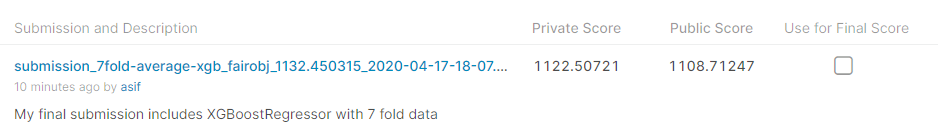

- The above model with seven fold was of good luck
- As it helped me in optimizing the MAE scores
- This model gave me 1122.50 on Private LB and 1108.71 on Public LB securing my rank among top 20%

## Conclusion:
- I have tried multiple experiments with the above data for bringing down my performance metric MAE.
- As a part of my experimentation I tried removing the outliers and then applying PCA on all of my features including categorical.
- Unfortunately, it didn't seem to work that well.So, I tried with different featurizations on data without outliers.
- But it didn't seem to work very well as removal of outliers was loss of information and it was not fitting the model as expected.
- So, after reading alot of Kaggle discussion and related research papers I found out couple of interesting things which includes the log transform of the target variable and then using np.exp func() to take the original form in eval metric.
- Another thing I came across was combination of features and then applying the ordinality technique with some modification.
- After reading most of the Kaggle forum discussion and research paper I came across one custom objective function aka Fair Loss.
- This fair loss is an approximation of optimizing the second order derivative as MAE is not continuously differentiable.
- This Fair Loss is the whole crux of this competition and my self case study too.
- This custom objective function alone helped me in showing the drastic improvement in my MAE score with some 7 folds XGBoostRegressor.
- Whereas on the other hand my DL models didn't perform very well.
- I also tried stacking and ensemble models to improve the further score with some important features obtained from DT but I didn' have enough luck for that.
- So, atlast I settled for the rank among top 20% with 1108.71 on Public LB and 1122.50 on Private LB.